In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
people_raw_df = pd.read_excel("data/HW3/People_School.xlsx")

In [4]:
people_raw_describe_df = people_raw_df.describe().reset_index()

In [5]:
people_all_df = people_raw_df[(people_raw_df['Academic Year'] == '2015-2016') & (people_raw_df['Local Education Agency (LEA) Type'] == 'School District')]

In [6]:
unwanted_grade_served = people_all_df[people_all_df.columns[people_all_df.columns.str.startswith('Grade Served: Age')]]

people_all_df.drop(unwanted_grade_served, axis=1, inplace=True)

unwanted_enrollment_grade = people_all_df[people_all_df.columns[people_all_df.columns.str.startswith('Enrollment: Grade')]]

unwanted_enrollment_am_pre_k = people_all_df[people_all_df.columns[people_all_df.columns.str.startswith('Grade Served: AM Pre-K')]]

unwanted_enrollment_pm_pre_k = people_all_df[people_all_df.columns[people_all_df.columns.str.startswith('Grade Served: PM Pre-K')]]

unwanted_enrollment_full_pre_k = people_all_df[people_all_df.columns[people_all_df.columns.str.startswith('Grade Served: Full Day Pre-K')]]

people_all_df.drop(unwanted_enrollment_grade, axis=1, inplace=True)

people_all_df.drop(unwanted_enrollment_am_pre_k, axis=1, inplace=True)

people_all_df.drop(unwanted_enrollment_pm_pre_k, axis=1, inplace=True)

people_all_df.drop(unwanted_enrollment_full_pre_k, axis=1, inplace=True)



nunique = people_all_df.apply(pd.Series.nunique)

cols_to_drop = nunique[nunique==1].index

people_all_df.drop(cols_to_drop, axis=1, inplace=True)

people_all_df = people_all_df.dropna(axis=1)

people_all_df.shape

/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(2756, 37)

In [7]:
people_highschool_df = people_all_df[people_all_df['Grade Served: 12th Grade'] == 'Yes']

In [8]:
unwanted_grade_served_all = people_highschool_df[people_highschool_df.columns[people_highschool_df.columns.str.startswith('Grade Served:')]]

people_highschool_df.drop(unwanted_grade_served_all, axis=1, inplace=True)

people_highschool_df.shape

people_highschool_df = people_highschool_df[people_highschool_df != 'Missing']

In [9]:
people_highschool_df['quartile_enrollment'] = pd.qcut(people_highschool_df['Enrollment: All Grades. Total.'].astype(int), 4, labels=False)

In [10]:
people_top_df = people_raw_describe_df[people_raw_describe_df['index'] == 'top']

In [11]:
people_top_df.head()

index Academic Year Administrative Unit Number  \
2   top     2008-2009                  126515001   

  Agency ID - NCES Assigned [District] Latest available year  \
2                                            4218990           

  Local Education Agency (LEA) Name Local Education Agency (LEA) Type  \
2              PHILADELPHIA CITY SD                   School District   

  PA School Code nces_schid     School Name          Opened Date  \
2           8888      05188  CENTRAL EL SCH  1999-07-23 00:00:00   

           Closed Date     School Type        County Grade Served: All Pre-K  \
2  2013-06-29 00:00:00  Regular School  Philadelphia                      No   

  Grade Served: AM Pre-K Grade Served: PM Pre-K Grade Served: Full Day Pre-K  \
2                     No                     No                           No   

  Grade Served: All Kindergarten Grade Served: Age 4 AM Kindergarten  \
2                            Yes                                  No   

  Grade Served: Age 4 PM Kindergarten  \
2                                  No   

  Grade Served: Age 4 Full Day Kindergarten  \
2                                        No   

  Grade Served: Age 5 AM Kindergarten Grade Served: Age 5 PM Kindergarten  \
2                                  No                                  No   

  Grade Served: Age 5 Full Day Kindergarten Grade Served: 1st Grade  \
2                                        No                     Yes   

  Grade Served: 2nd Grade Grade Served: 3rd Grade Grade Served: 4th Grade  \
2                     Yes                     Yes                     Yes   

  Grade Served: 5th Grade Grade Served: 6th Grade Grade Served: 7th Grade  \
2                     Yes                      No                      No   

  Grade Served: 8th Grade Grade Served: 9th Grade Grade Served: 10th Grade  \
2                      No                      No                       No   

  Grade Served: 11th Grade Grade Served: 12th Grade Grade Served: ug Grade  \
2                       No                       No                     No   

  Enrollment: Pre-K. Total. Enrollment: Kindergarten. Total.  \
2                         0                                0   

  Enrollment: Grade 1. Total. Enrollment: Grade 2. Total.  \
2                           0                           0   

  Enrollment: Grade 3. Total. Enrollment: Grade 4. Total.  \
2                           0                           0   

  Enrollment: Grade 5. Total. Enrollment: Grade 6. Total.  \
2                           0                           0   

  Enrollment: Grade 7. Total. Enrollment: Grade 8. Total.  \
2                           0                           0   

  Enrollment: Grade 9. Total. Enrollment: Grade 10. Total.  \
2                           0                            0   

  Enrollment: Grade 11. Total. Enrollment: Grade 12. Total.  \
2                            0                            0   

  Enrollment: Ungraded. Total. Enrollment: All Grades. Total.  \
2         Not Reported in Year                              0   

  Enrollment: All Grades. American Native.  \
2                                        0   

  Enrollment: All Grades. Asian or Pacific Islander.  \
2                                                  0   

  Enrollment: All Grades. Hispanic. Enrollment: All Grades. Black.  \
2                           Missing                        Missing   

  Enrollment: All Grades. White. Enrollment: All Grades. Two or More Races.  \
2                        Missing                       Not Reported in Year   

  Enrollment: Pre-K. Male. American Native.  \
2                      Not Reported in Year   

  Enrollment: Pre-K. Female. American Native.  \
2                        Not Reported in Year   

  Enrollment: Pre-K. Male. Asian or Pacific Islander.  \
2                               Not Reported in Year    

  Enrollment: Pre-K. Female. Asian or Pacific Islander.  \
2                               Not Rep

In [12]:
# outcomes = pd.read_excel("data/HW3/Outcomes_School.xlsx")
# opportunities = pd.read_excel("data/HW3/Opportunities_School.xlsx")
# finance_lea = pd.read_excel("data/HW3/Finance_LEA.xlsx")

# people_all_df = people_raw_df[(people_raw_df['Academic Year'] == '2015-2016')]
people_all_df = people_raw_df[(people_raw_df['Academic Year'] == '2015-2016') & (people_raw_df['Local Education Agency (LEA) Type'] == 'School District')]


# # del people['Number of Prekindergarten Teachers']
# # del people['Number of Full-Time Equivalent (FTE) Teachers']
# # del people['Number of Elementary Teachers']
# # del people['Number of Secondary Teachers']
# # del people['Number of Ungraded Teachers']
# # del people['Number of Kindergarten Teachers']

In [13]:
people_highschool_df.describe()

quartile_enrollment
count           601.000000
mean              1.495840
std               1.119702
min               0.000000
25%               0.000000
50%               1.000000
75%               2.000000
max               3.000000

In [14]:
people_highschool_df = people_highschool_df[people_highschool_df != 'Missing']



/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [15]:
people_highschool_df['quartile_enrollment'] = pd.qcut(people_highschool_df['Enrollment: All Grades. Total.'].astype(int), 4, labels=False)

In [16]:
people_highschool_df.shape

(601, 24)

In [17]:
people_highschool_df['Enrollment: All Grades. Total.'] = people_highschool_df['Enrollment: All Grades. Total.'].astype(int)

In [18]:
people_highschool_df.boxplot(by='quartile_enrollment',
                            column=['Enrollment: All Grades. Total.'],
                            grid=False)

In [19]:
people_highschool_df = people_highschool_df.replace({'Free and Reduced Lunch Eligible Students':{'Missing':0}})

In [20]:
people_highschool_df['quartile_free_reduced_eligible_students'] = pd.qcut(people_highschool_df['Free and Reduced Lunch Eligible Students'].astype(float), 4, labels=False)

In [21]:
people_highschool_enrollment_df = people_highschool_df[people_highschool_df['quartile_enrollment'] == 3]

In [22]:
people_highschool_county_agg_df = people_highschool_df.groupby('County').mean()

In [23]:
people_highschool_county_agg_df.head()

Enrollment: All Grades. Total.  quartile_enrollment  \
County                                                           
Adams                          693.833333             1.333333   
Allegheny                      874.500000             1.685185   
Armstrong                      694.000000             1.000000   
Beaver                         534.307692             1.000000   
Bedford                        513.800000             0.800000   

           quartile_free_reduced_eligible_students  
County                                              
Adams                                     1.333333  
Allegheny                                 1.518519  
Armstrong                                 1.200000  
Beaver                                    1.000000  
Bedford                                   1.400000

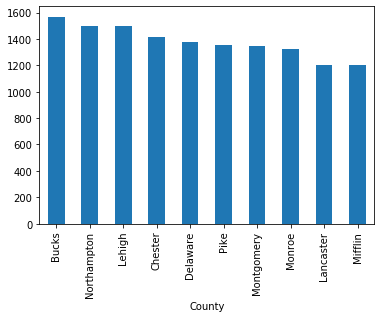

In [24]:
people_highschool_county_agg_df.sort_values(by='Enrollment: All Grades. Total.', ascending=False)['Enrollment: All Grades. Total.'].head(10).plot.bar()

In [25]:
people_highschool_df.head()

Administrative Unit Number  \
74                   101260303   
142                  101260803   
273                  101261302   
295                  101262903   
392                  101264003   

    Agency ID - NCES Assigned [District] Latest available year  \
74                                             4202100           
142                                            4204080           
273                                            4206660           
295                                            4210350           
392                                            4213320           

    Local Education Agency (LEA) Name PA School Code nces_schid  \
74            ALBERT GALLATIN AREA SD           6001      06001   
142               BROWNSVILLE AREA SD           4818      04818   
273             CONNELLSVILLE AREA SD           5228      05228   
295                        FRAZIER SD           2126      02126   
392               LAUREL HIGHLANDS SD           6600      06600   

                  School Name          Opened Date     School Type   County  \
74   ALBERT GALLATIN AREA SHS  1999-07-15 00:00:00  Regular School  Fayette   
142       BROWNSVILLE AREA HS  1999-09-16 00:00:00  Regular School  Fayette   
273    CONNELLSVILLE AREA SHS  1999-07-16 00:00:00  Regular School  Fayette   
295                FRAZIER HS  1997-06-24 00:00:00  Regular School  Fayette   
392      LAUREL HIGHLANDS SHS  1990-08-22 00:00:00  Regular School  Fayette   

     Enrollment: All Grades. Total. Enrollment: All Grades. American Native.  \
74                             1111                                        0   
142                             480                                        0   
273                            1162                                        3   
295                             340                                        0   
392                             943                                        1   

    Enrollment: All Grades. Asian or Pacific Islander.  \
74                                                   4   
142                                                  2   
273                                                  4   
295                                                  5   
392                                                  8   

    Enrollment: All Grades. Hispanic. Enrollment: All Grades. Black.  \
74                                 11                             50   
142                                 1                             73   
273                                 7                             14   
295                                 3                              4   
392                                 6                             54   

    Enrollment: All Grades. White. Enrollment: All Grades. Two or More Races.  \
74                            1031                                         15   
142                            399                                          5   
273                           1117                                         17   
295                            326                                          2   
392                            863                                         11   

    Enrollment: Percent From Low Income Families  \
74                                          48.9   
142                                         59.8   
273                                         52.6   
295                                         41.9   
392                                         54.2   

    Free and Reduced Lunch Eligible Students  \
74                                      1111   
142                                      287   
273                                     1162   
295                                      102   
392                                      441   

    Reduced-price Lunch Eligible Students Free Lunch Eligible Students  \
74                                      0                         1111   
142                     

In [26]:
people_highschool_df['Free and Reduced Lunch Eligible Students'] = people_highschool_df['Free and Reduced Lunch Eligible Students'].astype(float)

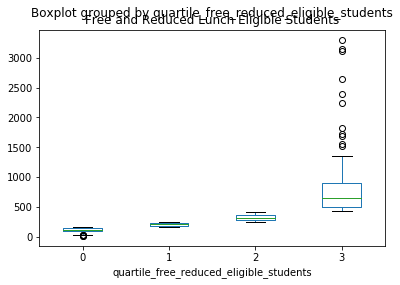

In [27]:
people_highschool_df.boxplot(by='quartile_free_reduced_eligible_students',
                            column=['Free and Reduced Lunch Eligible Students'],
                             grid=False)

In [28]:
people_highschool_low_income_df = people_highschool_df[people_highschool_df['quartile_free_reduced_eligible_students'] == 3]

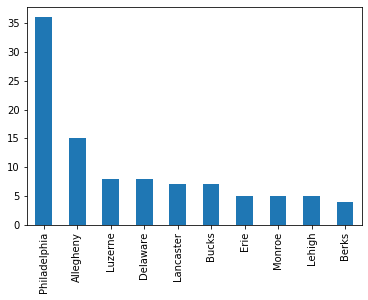

In [29]:
people_highschool_low_income_df['County'].value_counts().head(10).plot.bar()

In [30]:
people_highschool_df = people_highschool_df.fillna(0) 

In [31]:
### Concatenating
# Instruction 1: Provide an example of concatenating multiple feature extraction methods using your dataset.

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest


# iris = load_iris()

# X, y = iris.data, iris.target

# X.shape
# people_highschool_df.fillna('Missing')

In [32]:
X, y = people_highschool_df[['Free and Reduced Lunch Eligible Students', 'Pupil/Teacher Ratio', 'Number of Full-Time Equivalent (FTE) Teachers']].values, people_highschool_df[['Enrollment: All Grades. Total.']].values
X.reshape(-1, 1)
X.shape

(601, 3)

In [33]:
y = y.flatten()

In [34]:
y.shape

(601,)

In [35]:
# This dataset is way too high-dimensional. Better do PCA:
pca = PCA(n_components=2)

# Maybe some original features where good, too?
selection = SelectKBest(k=1)
# print("selections austin", selection)
# Build estimator from PCA and Univariate selection:

combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

In [36]:
# # Use combined features to transform dataset:
X_features = combined_features.fit(X, y).transform(X)

In [37]:
# X_features

In [38]:
svm = SVC(kernel="linear")

# Do grid search over k, n_components and C:

pipeline = Pipeline([("features", combined_features), ("svm", svm)])

param_grid = dict(features__pca__n_components=[1, 2, 3],
                  features__univ_select__k=[1, 2],
                  svm__C=[.1, 1, 10])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=10)
grid_search.fit(X, y)
# print(grid_search.best_estimator_)

/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.008, total=   0.1s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.000, total=   1.2s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.000, total=   0.9s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=1, score=0.006, total=   0.1s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=1 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s


[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=1, score=0.024, total=   3.8s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=1 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.1s remaining:    0.0s


[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=1, score=0.000, total=   2.2s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=10 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.3s remaining:    0.0s


[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=10, score=0.008, total=   0.3s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=10 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    8.6s remaining:    0.0s


[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=10, score=0.000, total=  14.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=10 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   22.7s remaining:    0.0s


[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=10, score=0.000, total=  17.5s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=2, svm__C=0.1, score=0.008, total=   0.1s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=0.1 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   40.2s remaining:    0.0s


[CV]  features__pca__n_components=1, features__univ_select__k=2, svm__C=0.1, score=0.012, total=   0.8s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=2, svm__C=0.1, score=0.000, total=   1.1s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=1 
[CV]  features__pca__n_components=1, features__univ_select__k=2, svm__C=1, score=0.008, total=   0.2s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=1 


KeyboardInterrupt: 

In [39]:
### Applications - Boston Housing Dataset
# Instruction 2: Provide an example of Outlier detection on your dataset.

import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.datasets import load_boston

# Get data
# X1 = people_highschool_df[['Enrollment: All Grades. Total.', 'Number of Full-Time Equivalent (FTE) Teachers']]


In [40]:
people_highschool_df['Pupil/Teacher Ratio'] = people_highschool_df['Pupil/Teacher Ratio'].astype(float)
people_highschool_df['Enrollment: All Grades. Total.'] = people_highschool_df['Enrollment: All Grades. Total.'].astype(float)

In [41]:
X1 = people_highschool_df[['Enrollment: All Grades. Total.', 'Pupil/Teacher Ratio']]


# Define "classifiers" to be used
classifiers = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.,
                                             contamination=0.261),
    "Robust Covariance (Minimum Covariance Determinant)":
    EllipticEnvelope(contamination=0.261),
    "OCSVM": OneClassSVM(nu=0.261, gamma=0.08)}
colors = ['m', 'g', 'b']
legend1 = {}
legend2 = {}

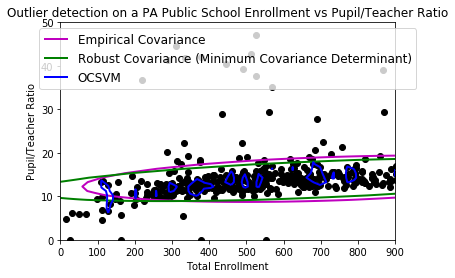

In [42]:

# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(0, 900), np.linspace(0,50))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1)
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(1)  # two clusters
plt.title("Outlier detection on a PA Public School Enrollment vs Pupil/Teacher Ratio")
plt.scatter(X1['Enrollment: All Grades. Total.'], X1['Pupil/Teacher Ratio'], color='black')
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")

plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend((legend1_values_list[0].collections[0],
            legend1_values_list[1].collections[0],
            legend1_values_list[2].collections[0]),
           (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=12))
plt.ylabel("Pupil/Teacher Ratio")
plt.xlabel("Total Enrollment")



plt.show()

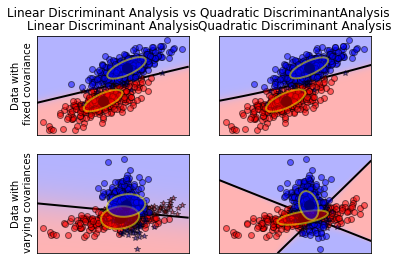

In [43]:
%matplotlib inline

from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# #############################################################################
# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)


# #############################################################################
# Generate datasets
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


def dataset_cov():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -1.], [2.5, .7]]) * 2.
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

# Plot functions
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with\n fixed covariance')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    elif fig_index == 3:
        plt.ylabel('Data with\n varying covariances')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    alpha = 0.5

    # class 0: dots
    plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'o', alpha=alpha,
             color='red', markeredgecolor='k')
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], '*', alpha=alpha,
             color='#990000', markeredgecolor='k')  # dark red

    # class 1: dots
    plt.plot(X1_tp[:, 0], X1_tp[:, 1], 'o', alpha=alpha,
             color='blue', markeredgecolor='k')
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], '*', alpha=alpha,
             color='#000099', markeredgecolor='k')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             'o', color='black', markersize=10, markeredgecolor='k')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             'o', color='black', markersize=10, markeredgecolor='k')

    return splot
def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='yellow',
                              linewidth=2, zorder=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariance_[0], 'red')
    plot_ellipse(splot, qda.means_[1], qda.covariance_[1], 'blue')

for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plot_lda_cov(lda, splot)
    plt.axis('tight')

    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    plot_qda_cov(qda, splot)
    plt.axis('tight')
    plt.suptitle('Linear Discriminant Analysis vs Quadratic Discriminant'
             'Analysis')
plt.show()

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
# print(X)

AttributeError: 'str' object has no attribute 'fit'

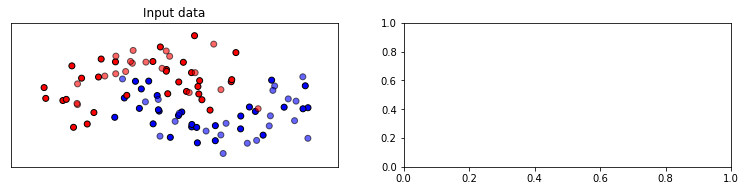

In [1145]:
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [47]:
outcomes_raw_df = pd.read_excel("data/HW3/Outcomes_School.xlsx")

KeyboardInterrupt: 

In [48]:
outcomes_all_df = outcomes_raw_df[(outcomes_raw_df['Academic Year'] == '2015-2016') & (outcomes_raw_df['Local Education Agency (LEA) Type'] == 'School District')]


In [49]:
# outcomes_all_df.columns.values

In [50]:
nunique = outcomes_all_df.apply(pd.Series.nunique)

cols_to_drop = nunique[nunique==1].index

outcomes_all_df.drop(cols_to_drop, axis=1, inplace=True)

# outcomes_all_df = outcomes_all_df.dropna(axis=1)

/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [51]:
outcomes_all_df.shape

(2756, 467)

In [53]:
outcomes_highschool_df = outcomes_all_df[outcomes_all_df['Grade Served: 12th Grade'] == 'Yes']

In [54]:
unwanted_grade_served = outcomes_highschool_df[outcomes_highschool_df.columns[outcomes_highschool_df.columns.str.startswith('Grade Served: Age')]]

outcomes_highschool_df.drop(unwanted_grade_served, axis=1, inplace=True)

unwanted_enrollment_grade = outcomes_highschool_df[outcomes_highschool_df.columns[outcomes_highschool_df.columns.str.startswith('Enrollment: Grade')]]

unwanted_enrollment_am_pre_k = outcomes_highschool_df[outcomes_highschool_df.columns[outcomes_highschool_df.columns.str.startswith('Grade Served: AM Pre-K')]]

unwanted_enrollment_pm_pre_k = outcomes_highschool_df[outcomes_highschool_df.columns[outcomes_highschool_df.columns.str.startswith('Grade Served: PM Pre-K')]]

unwanted_enrollment_full_pre_k = outcomes_highschool_df[outcomes_highschool_df.columns[outcomes_highschool_df.columns.str.startswith('Grade Served: Full Day Pre-K')]]

unwanted_percent_basic_elementary = outcomes_highschool_df[outcomes_highschool_df.columns[outcomes_highschool_df.columns.str.startswith('Percent Basic:')]]

unwanted_percent_below_elementary = outcomes_highschool_df[outcomes_highschool_df.columns[outcomes_highschool_df.columns.str.startswith('Percent Below:')]]

unwanted_percent_below_basic_elementary = outcomes_highschool_df[outcomes_highschool_df.columns[outcomes_highschool_df.columns.str.startswith('Percent Below Basic:')]]

unwanted_percent_proficient_elementary = outcomes_highschool_df[outcomes_highschool_df.columns[outcomes_highschool_df.columns.str.startswith('Percent Proficient:')]]

unwanted_percent_advanced_elementary = outcomes_highschool_df[outcomes_highschool_df.columns[outcomes_highschool_df.columns.str.startswith('Percent Advanced:')]]

unwanted_number_scored_elementary = outcomes_highschool_df[outcomes_highschool_df.columns[outcomes_highschool_df.columns.str.startswith('Number Scored:')]]



outcomes_highschool_df.drop(unwanted_enrollment_grade, axis=1, inplace=True)

outcomes_highschool_df.drop(unwanted_enrollment_am_pre_k, axis=1, inplace=True)

outcomes_highschool_df.drop(unwanted_enrollment_pm_pre_k, axis=1, inplace=True)

outcomes_highschool_df.drop(unwanted_enrollment_full_pre_k, axis=1, inplace=True)

outcomes_highschool_df.drop(unwanted_percent_basic_elementary, axis=1, inplace=True)

outcomes_highschool_df.drop(unwanted_percent_below_elementary, axis=1, inplace=True)

outcomes_highschool_df.drop(unwanted_percent_below_basic_elementary, axis=1, inplace=True)

outcomes_highschool_df.drop(unwanted_percent_proficient_elementary, axis=1, inplace=True)

outcomes_highschool_df.drop(unwanted_percent_advanced_elementary, axis=1, inplace=True)

outcomes_highschool_df.drop(unwanted_number_scored_elementary, axis=1, inplace=True)

In [55]:
# outcomes_highschool_df.columns.values

In [56]:
# df.replace({'num_pets':{0:1}})
outcomes_highschool_df = outcomes_highschool_df.replace({'Number of Grade 12 Students Scoring 1550 or Higher on the SAT':{'Missing':0}})

In [57]:
outcomes_highschool_df = outcomes_highschool_df.replace({'Number of Grade 12 Students Scoring 22 or Higher on the ACT':{'Missing':0}})

In [58]:
outcomes_highschool_df = outcomes_highschool_df.replace({'CRDC: SAT/ACT Exam Participation. Male. Total.':{'Missing':0}})

In [59]:
outcomes_highschool_df = outcomes_highschool_df.replace({'CRDC: SAT/ACT Exam Participation. Female. Total.':{'Missing':0}})

In [60]:
outcomes_highschool_df['Percent of Grade 12 Students Scoring 1550 or Higher on the SAT.'] = (outcomes_highschool_df['Number of Grade 12 Students Scoring 1550 or Higher on the SAT'].astype(float) / (outcomes_highschool_df['CRDC: SAT/ACT Exam Participation. Male. Total.'].astype(float) + outcomes_highschool_df['CRDC: SAT/ACT Exam Participation. Female. Total.'].astype(float))) * 100

In [61]:
outcomes_highschool_df['Percent of Grade 12 Students Scoring 22 or Higher on the ACT'] = (outcomes_highschool_df['Number of Grade 12 Students Scoring 22 or Higher on the ACT'].astype(float) / (outcomes_highschool_df['Number of Grade 12 Students Scoring 22 or Higher on the ACT'].astype(float) + outcomes_highschool_df['CRDC: SAT/ACT Exam Participation. Female. Total.'].astype(float))) * 100

In [62]:
outcomes_highschool_df.shape

(601, 360)

In [63]:
opportunities_raw_df = pd.read_excel("data/HW3/Opportunities_School.xlsx")

In [64]:
opportunities_all_df = opportunities_raw_df[(opportunities_raw_df['Academic Year'] == '2015-2016') & (opportunities_raw_df['Local Education Agency (LEA) Type'] == 'School District')]


In [65]:
opportunities_all_df.shape

(2756, 171)

In [66]:
nunique = opportunities_all_df.apply(pd.Series.nunique)

cols_to_drop = nunique[nunique==1].index

opportunities_all_df.drop(cols_to_drop, axis=1, inplace=True)

In [67]:
# opportunities_all_df.columns.values

In [68]:
opportunities_highschool_df = opportunities_all_df[opportunities_all_df['Grade Served: 12th Grade'] == 'Yes']

In [69]:
opportunities_highschool_df.shape

(601, 168)

In [70]:
unwanted_enrollment_grade_served = opportunities_highschool_df[opportunities_highschool_df.columns[opportunities_highschool_df.columns.str.startswith('Grade Served:')]]

In [71]:
opportunities_highschool_df.drop(unwanted_enrollment_grade_served, axis=1, inplace=True)


In [72]:
# opportunities_all_df.columns.values

In [73]:
unwanted_lea_pre_k = opportunities_highschool_df[opportunities_highschool_df.columns[opportunities_highschool_df.columns.str.startswith('CRDC: LEA Pre-K')]]

In [74]:
opportunities_highschool_df.drop(unwanted_lea_pre_k, axis=1, inplace=True)


In [75]:
finance_raw_df = pd.read_excel("data/HW3/Finance_LEA.xlsx")

In [76]:
finance_raw_df.shape

(8177, 431)

In [77]:
finance_raw_df.describe()

year        aun  nces_leaid               leaname  \
count        8177       8177        7410                  8177   
unique         12        787         778                   787   
top     2016-2017  113363807     4280270  LANCASTER COUNTY CTC   
freq          767         44          40                    44   

                leatype  schoolnumber  nces_schid                schoolname  \
count              8177          8177        2367                      8177   
unique                6           295         285                       800   
top     School District          8888         897  ALLIANCE FOR PROGRESS CS   
freq               5492          5547          10                        11   

                   opendate            closedate       schooltype  \
count                  8177                  218             8177   
unique                  183                   20                7   
top     1999-06-08 00:00:00  2014-06-29 00:00:00  School District   
freq                   3768                   31             5492   

              county gradeserved_pk gradeserved_pka gradeserved_pkp  \
count           8177           8177            8177            8177   
unique            69              3               3               3   
top     Philadelphia             No              No              No   
freq             855           7551            7867            7929   

       gradeserved_pkf gradeserved_k gradeserved_k4a gradeserved_k4p  \
count             8177          8177            8177            8177   
unique               3             3               3               3   
top                 No           Yes              No              No   
freq              7860          6568            7974            7987   

       gradeserved_k4f gradeserved_k5a gradeserved_k5p gradeserved_k5f  \
count             8177            8177            8177            8177   
unique               3               3               3               3   
top                 No              No              No             Yes   
freq              7951            6713            6772            5479   

       gradeserved_1st gradeserved_2nd gradeserved_3rd gradeserved_4th  \
count             8177            8177            8177            8177   
unique               3               3               3               3   
top                Yes             Yes             Yes             Yes   
freq              6570            6571            6560            6548   

       gradeserved_5th gradeserved_6th gradeserved_7th gradeserved_8th  \
count             8177            8177            8177            8177   
unique               3               3               3               3   
top                Yes             Yes             Yes             Yes   
freq              6601            6668            6657            6650   

       gradeserved_9th gradeserved_10th gradeserved_11th gradeserved_12th  \
count             8177             8177             8177             8177   
unique               3                3                3                3   
top                Yes              Yes              Yes              Yes   
freq              6806             7191             7176             7169   

       gradeserved_ug exp_1000 exp_2000  exp_3000 exp_current  exp_4000  \
count            8177     8177     8177      8177        8177      8177   
unique              3     7877     7877      7552        7877      2626   
top                No  Missing  Missing         0     Missing         0   
freq             8059      134      134       348         134      5318   

        exp_5000 exp_total  exp_aie  exp_1100  exp_1200  exp_1300  exp_1400  \
count       8177      8177     8177      8177      8177      8177      8177   
unique      7099      7877     5063      7575      7473      6271      6540   
top            0   Missing        0         0         0         0         0   
freq         766       134     1

In [78]:
finance_all_df = finance_raw_df[(finance_raw_df['year'] == '2015-2016') & (finance_raw_df['leatype'] == 'School District')]

In [79]:
# finance_all_df.columns.values

In [80]:
people_highschool_df.shape

(601, 25)

In [81]:
opportunities_highschool_df.shape

(601, 137)

In [82]:
outcomes_highschool_df.shape

(601, 360)

In [83]:
people_outcomes_highschool_df = pd.merge(people_highschool_df, outcomes_highschool_df, on='School Name')

In [84]:
people_outcomes_highschool_df.shape

(603, 384)

In [85]:
people_outcomes_opportunities_highschool_df = people_outcomes_highschool_df.merge(opportunities_highschool_df, on='School Name')

In [86]:
people_outcomes_opportunities_highschool_df.shape

(607, 520)

In [87]:
unwanted_grade_served = people_outcomes_opportunities_highschool_df[people_outcomes_opportunities_highschool_df.columns[people_outcomes_opportunities_highschool_df.columns.str.startswith('Grade Served:')]]

people_outcomes_opportunities_highschool_df.drop(unwanted_grade_served, axis=1, inplace=True)

In [88]:

people_outcomes_opportunities_highschool_df = people_outcomes_opportunities_highschool_df.drop(columns=[
       'CRDC: PreK Students Receiving Only One Suspension. Male. Hispanic.',
])

In [89]:
# people_outcomes_opportunities_highschool_df.columns.values
# 'CRDC: FTE Teachers. Total.'
people_outcomes_opportunities_highschool_df[['4 Year Cohort Graduation Rate: Total']] = people_outcomes_opportunities_highschool_df[['4 Year Cohort Graduation Rate: Total']].replace('Missing', 0)

# people_outcomes_opportunities_highschool_df[['CRDC: FTE Teachers. Total.']]

In [90]:
people_outcomes_opportunities_highschool_df[['Graduates: Total Postsecondary Bound']] = people_outcomes_opportunities_highschool_df[['Graduates: Total Postsecondary Bound']].replace('Missing', 0)

In [91]:
people_outcomes_opportunities_highschool_df[['CRDC: FTE Teachers. Total.']] = people_outcomes_opportunities_highschool_df[['CRDC: FTE Teachers. Total.']].replace('Missing', 0)
people_outcomes_opportunities_highschool_df[['CRDC: FTE Teachers. Total.']] = people_outcomes_opportunities_highschool_df[['CRDC: FTE Teachers. Total.']].replace('No', 0)
people_outcomes_opportunities_highschool_df[['CRDC: FTE Teachers. Total.']] = people_outcomes_opportunities_highschool_df[['CRDC: FTE Teachers. Total.']].replace('Yes', 0)

In [92]:
people_outcomes_opportunities_highschool_df[['Graduates: Percent Postsecondary Bound']] = people_outcomes_opportunities_highschool_df[['Graduates: Percent Postsecondary Bound']].replace('Missing', 0)

In [93]:
# Instruction 3

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .5  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

# X, y = people_highschool_df[['Free and Reduced Lunch Eligible Students', 'Pupil/Teacher Ratio', 'Number of Full-Time Equivalent (FTE) Teachers']].values, people_highschool_df[['Enrollment: All Grades. Total.']].values


X, y = people_outcomes_opportunities_highschool_df[['Number of Grade 12 Students Scoring 22 or Higher on the ACT', '4 Year Cohort Graduation Rate: Total', 'CRDC: FTE Teachers. Total.']].values.astype(float), people_outcomes_opportunities_highschool_df[['Graduates: Total Postsecondary Bound']].values.astype(float)

# X = X.astype(str)
# y = y.astype(str)

In [ ]:
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [95]:
# people_outcomes_opportunities_highschool_df.columns.values
people_outcomes_opportunities_highschool_df[['Pupil/Teacher Ratio']] = people_outcomes_opportunities_highschool_df[['Pupil/Teacher Ratio']].replace("Missing", 0)

In [96]:
people_outcomes_opportunities_highschool_df = people_outcomes_opportunities_highschool_df.fillna(0)

In [97]:
people_outcomes_opportunities_highschool_df = people_outcomes_opportunities_highschool_df.replace(np.inf, 0)

In [98]:
# Instruction 4


import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
X, y = people_outcomes_opportunities_highschool_df[['Pupil/Teacher Ratio', '4 Year Cohort Graduation Rate: Total', 'Enrollment: All Grades. Total.']].values.astype(float), people_outcomes_opportunities_highschool_df[['Graduates: Total Postsecondary Bound']].values.astype(float)

# ax.scatter(X[:, 1], X[:, 0], X[:, 1],

# print(y[:])
# for i in y:
#     print(i)

In [99]:
print(X)

[[  16.72   90.18 1111.  ]
 [  12.9    79.72  480.  ]
 [  14.75   69.06 1162.  ]
 ...
 [  13.93   93.75  651.  ]
 [  10.11   95.77  368.  ]
 [   9.64   88.33  413.  ]]


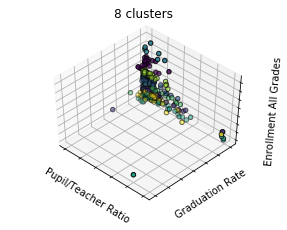

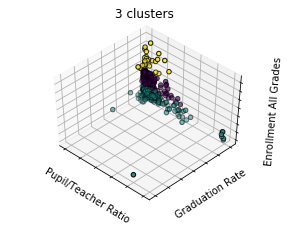

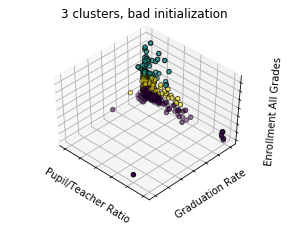

In [100]:
estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 1], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Pupil/Teacher Ratio')
    ax.set_ylabel('Graduation Rate')
    ax.set_zlabel('Enrollment All Grades')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1
    

In [101]:
graduates_percent_postsecondary_bound = people_outcomes_opportunities_highschool_df['Graduates: Percent Postsecondary Bound'].astype(float)

In [102]:
graduates_percent_postsecondary_bound.shape

(607,)

In [103]:
graduates_percent_postsecondary_bound_counts_df = graduates_percent_postsecondary_bound.value_counts(bins=4)

In [104]:
graduates_percent_postsecondary_bound_counts_df.astype(int)

(49.47, 74.205]      286
(74.205, 98.94]      240
(-0.0999, 24.735]     63
(24.735, 49.47]       18
Name: Graduates: Percent Postsecondary Bound, dtype: int64

In [105]:
# people_outcomes_opportunities_highschool_df.columns.values

In [106]:
len(graduates_percent_postsecondary_bound_counts_df)

4

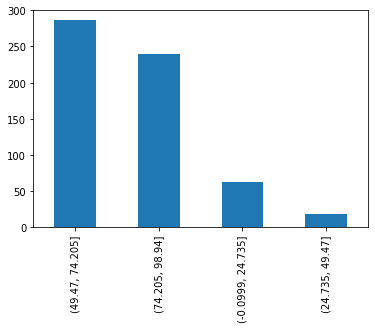

In [107]:
graduates_percent_postsecondary_bound_counts_df.plot.bar()

{'whiskers': [<matplotlib.lines.Line2D at 0x1a342fa1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a349eda90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a342fa310>],
 'medians': [<matplotlib.lines.Line2D at 0x1a349f7a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a349f7390>],
 'means': []}

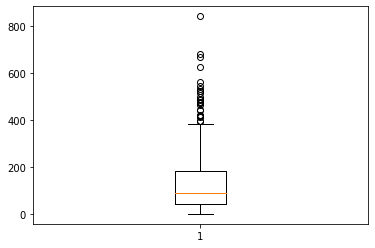

In [108]:
plt.boxplot(people_outcomes_opportunities_highschool_df['Graduates: Total Postsecondary Bound'].astype(float))

In [109]:
# Instruction 4

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

number_different_ap_courses_provided_df = people_outcomes_opportunities_highschool_df['CRDC: Number of Different AP Courses Provided']
number_different_ap_courses_provided_df = number_different_ap_courses_provided_df.replace('Missing',0)
number_different_ap_courses_provided_df = number_different_ap_courses_provided_df.astype(int)
print(number_different_ap_courses_provided_df.dtype)

outliers=[]
def detect_outlier(data_1):
    
    threshold=2
    mean_1 = np.mean(data_1)
    print("mean", mean_1)
    std_1 =np.std(data_1)
    print("std_1", std_1)

    
    for y in data_1:
        z_score= (y - mean_1)/std_1
#         print(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers



int64


In [110]:
outlier_datapoints = detect_outlier(number_different_ap_courses_provided_df)

mean 8.672158154859966
std_1 7.226593697076888


{'whiskers': [<matplotlib.lines.Line2D at 0x1a34895c10>,
 'caps': [<matplotlib.lines.Line2D at 0x1a348950d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a349966d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a348a6dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a348a6e90>],
 'means': []}

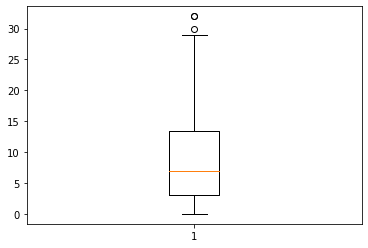

In [111]:
plt.boxplot(number_different_ap_courses_provided_df)

In [112]:
print(outlier_datapoints)

[30, 25, 25, 32, 29, 28, 26, 32, 28, 28, 25, 27, 25, 27, 24, 24, 24, 26, 25, 26, 26, 24, 25]


In [113]:
sorted_number_different_ap_courses_provided_df = sorted(number_different_ap_courses_provided_df)

q1_b, q3_b= np.percentile(number_different_ap_courses_provided_df,[25,75])
iqr_b = q3_b - q1_b
lower_bound_b = q1_b -(1.5 * iqr_b) 
upper_bound_b = q3_b +(1.5 * iqr_b)

In [114]:
number_different_ap_courses_provided_df.dtype

dtype('int64')

In [115]:
graduates_percent_postsecondary_bound_counts_df = sorted(graduates_percent_postsecondary_bound_counts_df)
q1, q3= np.percentile(graduates_percent_postsecondary_bound_counts_df,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

In [116]:
lower_bound

-247.875

In [117]:
upper_bound.dtype

dtype('float64')

In [118]:
upper_bound_b = upper_bound_b.astype(int)

In [119]:
upper_bound_b.dtype

dtype('int64')

In [120]:
lower_bound_b

-12.75

In [121]:
# df[df.a > 1].sum()


In [122]:
different_ap_courses_provided_bound_outliers_totals_df = number_different_ap_courses_provided_df[number_different_ap_courses_provided_df > upper_bound_b].count()


In [123]:
different_ap_courses_provided_bound_outliers_fraction_df = different_ap_courses_provided_bound_outliers_totals_df/len(number_different_ap_courses_provided_df)

In [124]:
different_ap_courses_provided_bound_outliers_fraction_df

0.004942339373970346

In [125]:
rng = np.random.RandomState(42)

# Example settings
n_samples = len(number_different_ap_courses_provided_df) 
print(n_samples)
outliers_fraction = different_ap_courses_provided_bound_outliers_fraction_df
clusters_separation = [0, 1, 2]

# define two outlier detection tools to be compared
classifiers = {
    "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,
                                     kernel="rbf", gamma=0.1),
    "Robust covariance": EllipticEnvelope(contamination=outliers_fraction),
    "Isolation Forest": IsolationForest(max_samples=n_samples,
                                        contamination=outliers_fraction,
                                        random_state=rng),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=35,
        contamination=outliers_fraction)}

# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.ones(n_samples, dtype=int)
ground_truth[-n_outliers:] = -1
mean_1 = np.mean(number_different_ap_courses_provided_df)
std_1 = np.std(number_different_ap_courses_provided_df)

# X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
# X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset

607


[[-0.5081451   1.89192291]
 [-0.64652288  1.75354513]
 [-0.09301175  2.30705625]
 ...
 [ 0.04536603  2.44543403]
 [-0.64652288  1.75354513]
 [-0.92327844  1.47678956]]


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-38.582714713614514 > -40.895567890846500). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-38.582714713614514 > -39.134941138889261). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  Futu

[[-0.5081451   1.89192291]
 [-0.64652288  1.75354513]
 [-0.09301175  2.30705625]
 ...
 [ 0.04536603  2.44543403]
 [-0.64652288  1.75354513]
 [-0.92327844  1.47678956]]


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-37.907642889542387 > -38.416802835460018). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-38.734018333750306 > -40.408556050784007). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-38.416802835460018 > -40.024435972323374). You may want to try with a higher value of support_f

[[-0.5081451   1.89192291]
 [-0.64652288  1.75354513]
 [-0.09301175  2.30705625]
 ...
 [ 0.04536603  2.44543403]
 [-0.64652288  1.75354513]
 [-0.92327844  1.47678956]]


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-37.579669784633424 > -37.667524416866719). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-37.579669784633424 > -38.980067314427345). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-37.579669784633424 > -40.484501415989293). You may want to try with a higher value of support_f

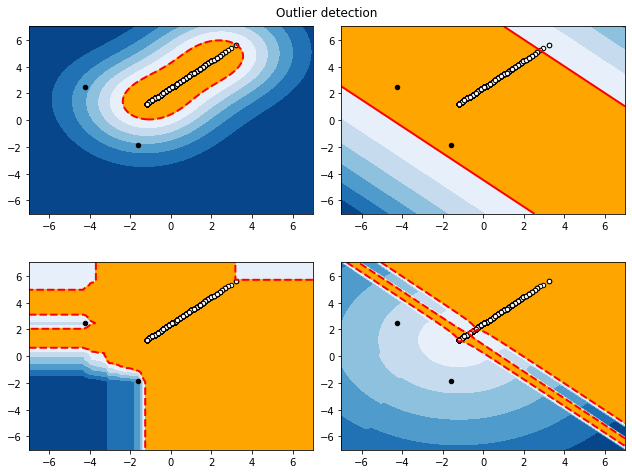

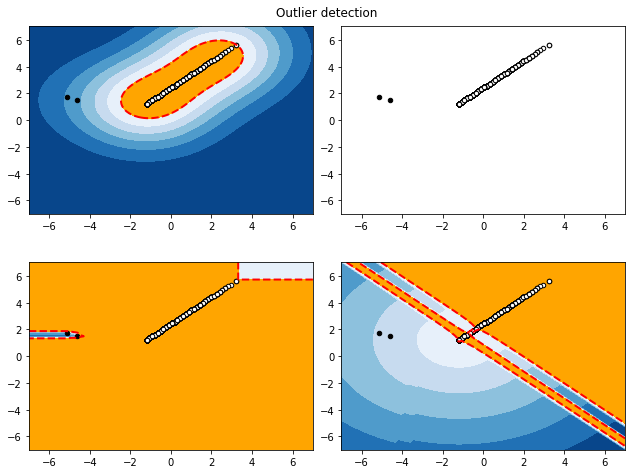

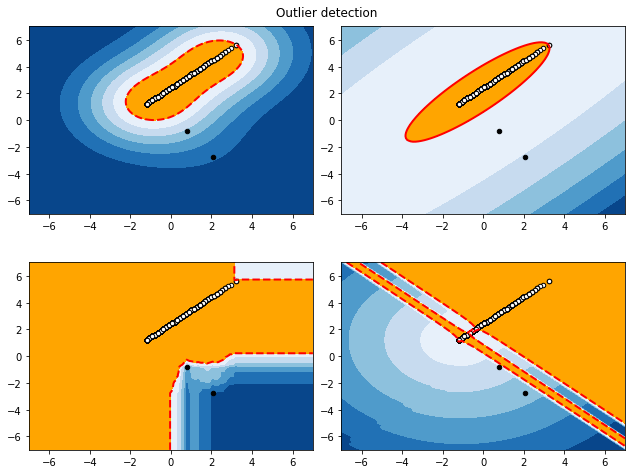

In [126]:
# Fit the problem with varying cluster separation
for i, offset in enumerate(clusters_separation):
#     np.random.seed(42)
    # Data generation
    X1 = []
    X2 = []
    for y in number_different_ap_courses_provided_df:
        X1.append((y - mean_1)/std_1)
        X2.append((y + mean_1)/std_1)
#     print(X1)
#     X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
#     X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
    X = np.r_['1,2,0',X1, X2]
    print(X)
 
    # Add outliers
    X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]
    # Fit the model
    plt.figure(figsize=(9, 7))
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        # fit the data and tag outliers
        if clf_name == "Local Outlier Factor":
            y_pred = clf.fit_predict(X)
            scores_pred = clf.negative_outlier_factor_
        else:
            clf.fit(X)
            scores_pred = clf.decision_function(X)
            y_pred = clf.predict(X)
        threshold = stats.scoreatpercentile(scores_pred,
                                            100 * outliers_fraction)
#         n_errors = (y_pred != ground_truth).sum()
        # plot the levels lines and the points
        if clf_name == "Local Outlier Factor":
            # decision_function is private for LOF
            Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        subplot = plt.subplot(2, 2, i + 1)
        subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7), cmap=plt.cm.Blues_r)
        a = subplot.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='red')
        subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='orange')
        b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white', s=20, edgecolor='k')
        c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black', s=20, edgecolor='k')
        subplot.axis('tight')
#         subplot.legend( [a.collections[0], b, c], 'learned decision function', 'true inliers', 'true outliers', prop=matplotlib.font_manager.FontProperties(size=10), loc='lower right')
#         subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
        subplot.set_xlim((-7, 7))
        subplot.set_ylim((-7, 7))
    plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
    plt.suptitle("Outlier detection")

plt.show()

In [127]:
# people_outcomes_opportunities_highschool_df.columns.values

In [128]:
graduation_percentage_analysis_df = people_outcomes_opportunities_highschool_df[['School Name','County_x','Graduates: Percent College Bound', 'Graduates: Percent Non Degree Granting Postsecondary Institution Bound', 'Graduates: Percent Postsecondary Bound', 'Number of Grade 12 Students Scoring 1550 or Higher on the SAT', 'Number of Grade 12 Students Scoring 22 or Higher on the ACT', 'CRDC: SAT/ACT Exam Participation. Male. Total.', 'CRDC: SAT/ACT Exam Participation. Female. Total.']]

In [129]:
graduation_percentage_analysis_df['Number of Grade 12 Students Scoring 1550 or Higher on the SAT'].dtype

dtype('O')

In [130]:
filtered_graduation_percentage_analysis_df = graduation_percentage_analysis_df[graduation_percentage_analysis_df['Number of Grade 12 Students Scoring 1550 or Higher on the SAT'] != 0.0 ]

In [131]:
filtered_graduation_percentage_analysis_df['Graduates: Percent College Bound'] = filtered_graduation_percentage_analysis_df['Graduates: Percent College Bound'].replace('Missing', 0).astype(float)

filtered_graduation_percentage_analysis_df['Graduates: Percent Non Degree Granting Postsecondary Institution Bound'] = filtered_graduation_percentage_analysis_df['Graduates: Percent Non Degree Granting Postsecondary Institution Bound'].replace('Missing', 0).astype(float)

filtered_graduation_percentage_analysis_df['Graduates: Percent Postsecondary Bound'] = filtered_graduation_percentage_analysis_df['Graduates: Percent Postsecondary Bound'].replace('Missing', 0).astype(float)
filtered_graduation_percentage_analysis_df['Number of Grade 12 Students Scoring 1550 or Higher on the SAT'] = filtered_graduation_percentage_analysis_df['Number of Grade 12 Students Scoring 1550 or Higher on the SAT'].replace('Missing', 0).astype(float)

filtered_graduation_percentage_analysis_df['Number of Grade 12 Students Scoring 22 or Higher on the ACT'] = filtered_graduation_percentage_analysis_df['Number of Grade 12 Students Scoring 22 or Higher on the ACT'].replace('Missing', 0).astype(float)

filtered_graduation_percentage_analysis_df['CRDC: SAT/ACT Exam Participation. Male. Total.'] = filtered_graduation_percentage_analysis_df['CRDC: SAT/ACT Exam Participation. Male. Total.'].replace('Missing', 0).astype(float)

filtered_graduation_percentage_analysis_df['CRDC: SAT/ACT Exam Participation. Female. Total.'] = filtered_graduation_percentage_analysis_df['CRDC: SAT/ACT Exam Participation. Female. Total.'].replace('Missing', 0).astype(float)

filtered_graduation_percentage_analysis_df['Graduates: Percent College Bound'] = filtered_graduation_percentage_analysis_df['Graduates: Percent College Bound'].replace('Missing', 0).astype(float)

filtered_graduation_percentage_analysis_df = filtered_graduation_percentage_analysis_df[filtered_graduation_percentage_analysis_df['CRDC: SAT/ACT Exam Participation. Female. Total.'] != 0.0]

filtered_graduation_percentage_analysis_df = filtered_graduation_percentage_analysis_df[filtered_graduation_percentage_analysis_df['CRDC: SAT/ACT Exam Participation. Male. Total.'] != 0.0]

filtered_graduation_percentage_analysis_df = filtered_graduation_percentage_analysis_df[filtered_graduation_percentage_analysis_df['Number of Grade 12 Students Scoring 22 or Higher on the ACT'] != 0.0]

/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value 

In [132]:
# Instruction 5

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA

# #############################################################################
# Dataset based latent variables model

percent_graduates_college_bound_df = (filtered_graduation_percentage_analysis_df['Graduates: Percent College Bound'] / 100).astype(float)

percent_graduates_non_degree_college_bound_df = (filtered_graduation_percentage_analysis_df['Graduates: Percent Non Degree Granting Postsecondary Institution Bound'] / 100).astype(float)

percent_postsecondary_bound_df = (filtered_graduation_percentage_analysis_df['Graduates: Percent Postsecondary Bound'] / 100).astype(float)

filtered_graduation_percentage_analysis_df['Percent of Grade 12 Students Scoring 1550 or Higher on the SAT'] = (filtered_graduation_percentage_analysis_df['Number of Grade 12 Students Scoring 1550 or Higher on the SAT'] / (filtered_graduation_percentage_analysis_df['CRDC: SAT/ACT Exam Participation. Male. Total.'] + filtered_graduation_percentage_analysis_df['CRDC: SAT/ACT Exam Participation. Female. Total.'])).astype(float)

filtered_graduation_percentage_analysis_df['Percent of Grade 12 Students Scoring 22 or Higher on the ACT'] = (filtered_graduation_percentage_analysis_df['Number of Grade 12 Students Scoring 22 or Higher on the ACT'] / (filtered_graduation_percentage_analysis_df['CRDC: SAT/ACT Exam Participation. Male. Total.'] + filtered_graduation_percentage_analysis_df['CRDC: SAT/ACT Exam Participation. Female. Total.'])).astype(float)

filtered_graduation_percentage_analysis_df['Graduates: Percent Postsecondary Bound'] = (filtered_graduation_percentage_analysis_df['Graduates: Percent Postsecondary Bound'] / 100).astype(float)

filtered_graduation_percentage_analysis_df['Graduates: Percent Non Degree Granting Postsecondary Institution Bound'] = (filtered_graduation_percentage_analysis_df['Graduates: Percent Non Degree Granting Postsecondary Institution Bound'] / 100).astype(float)

filtered_graduation_percentage_analysis_df['Graduates: Percent College Bound'] = (filtered_graduation_percentage_analysis_df['Graduates: Percent College Bound'] / 100).astype(float)

percent_students_scoring1550_higher_sat_df = filtered_graduation_percentage_analysis_df['Percent of Grade 12 Students Scoring 1550 or Higher on the SAT']

percent_students_scoring22_higher_act_df = filtered_graduation_percentage_analysis_df['Percent of Grade 12 Students Scoring 22 or Higher on the ACT']

filtered_graduation_percentage_analysis_df = filtered_graduation_percentage_analysis_df.replace(np.inf, 0)
filtered_graduation_percentage_analysis_df = filtered_graduation_percentage_analysis_df.fillna(0)
# print(filtered_graduation_percentage_analysis_df)

n = len(filtered_graduation_percentage_analysis_df)
# 2 latents vars:
l1 = percent_graduates_college_bound_df
l2 = percent_postsecondary_bound_df
l3 = percent_students_scoring1550_higher_sat_df
l4 = percent_students_scoring22_higher_act_df
# print('l1', l1)

latents_x = np.array([l1, l1, l4, l4]).T.astype(float)
latents_y = np.array([l2, l2, l3, l3]).T.astype(float)

# print("Latents", latents)
X = latents_x 
Y = latents_y 
X_train = X[:n // 2]
Y_train = Y[:n // 2]
print("yTrain",Y_train)
print("yTrain",Y_train)

X_test = X[n // 2:]
Y_test = Y[n // 2:]
print(X.dtype)
X_train = X[:n // 2]
Y_train = Y[:n // 2]
X_test = X[n // 2:]
Y_test = Y[n // 2:]

print("Corr(X)")
print(np.round(np.corrcoef(X.T), 2))
print("Corr(Y)")
print(np.round(np.corrcoef(Y.T), 2))

yTrain [[0.5623     0.5623     0.16574586 0.16574586]
 [0.6466     0.6466     0.2        0.2       ]
 [0.6972     0.6972     0.31147541 0.31147541]
 ...
 [0.5116     0.5116     0.40425532 0.40425532]
 [0.6626     0.6626     0.28426396 0.28426396]
 [0.7114     0.7114     0.60621762 0.60621762]]
yTrain [[0.5623     0.5623     0.16574586 0.16574586]
 [0.6466     0.6466     0.2        0.2       ]
 [0.6972     0.6972     0.31147541 0.31147541]
 ...
 [0.5116     0.5116     0.40425532 0.40425532]
 [0.6626     0.6626     0.28426396 0.28426396]
 [0.7114     0.7114     0.60621762 0.60621762]]
float64
Corr(X)
[[1.   1.   0.35 0.35]
 [1.   1.   0.35 0.35]
 [0.35 0.35 1.   1.  ]
 [0.35 0.35 1.   1.  ]]
Corr(Y)
[[1.   1.   0.26 0.26]
 [1.   1.   0.26 0.26]
 [0.26 0.26 1.   1.  ]
 [0.26 0.26 1.   1.  ]]


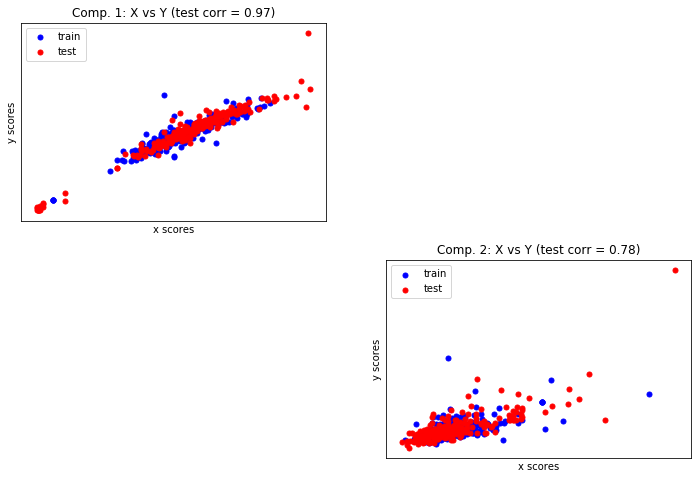

In [133]:
# #############################################################################
# Canonical (symmetric) PLS

# Transform data
# ~~~~~~~~~~~~~~
plsca = PLSCanonical(n_components=2)
plsca.fit(X_train, Y_train)
X_train_r, Y_train_r = plsca.transform(X_train, Y_train)
X_test_r, Y_test_r = plsca.transform(X_test, Y_test)

# Scatter plot of scores
# ~~~~~~~~~~~~~~~~~~~~~~
# 1) On diagonal plot X vs Y scores on each components
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.scatter(X_train_r[:, 0], Y_train_r[:, 0], label="train",
            marker="o", c="b", s=25)
plt.scatter(X_test_r[:, 0], Y_test_r[:, 0], label="test",
            marker="o", c="r", s=25)
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title('Comp. 1: X vs Y (test corr = %.2f)' %
          np.corrcoef(X_test_r[:, 0], Y_test_r[:, 0])[0, 1])
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

plt.subplot(224)
plt.scatter(X_train_r[:, 1], Y_train_r[:, 1], label="train",
            marker="o", c="b", s=25)
plt.scatter(X_test_r[:, 1], Y_test_r[:, 1], label="test",
            marker="o", c="r", s=25)
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title('Comp. 2: X vs Y (test corr = %.2f)' %
          np.corrcoef(X_test_r[:, 1], Y_test_r[:, 1])[0, 1])
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

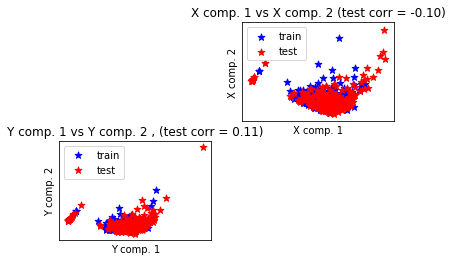

True B (such that: Y = XB + Err)
[[1 1 1]
 [2 2 2]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
Estimated B
[[ 1.   1.   1. ]
 [ 2.   2.   1.9]
 [ 0.  -0.  -0. ]
 [ 0.   0.   0. ]
 [-0.1  0.   0.1]
 [ 0.  -0.   0. ]
 [ 0.   0.  -0. ]
 [-0.   0.  -0. ]
 [-0.  -0.   0. ]
 [ 0.   0.  -0. ]]
Estimated betas
[[ 1. ]
 [ 2. ]
 [ 0. ]
 [ 0. ]
 [-0. ]
 [ 0. ]
 [-0. ]
 [-0. ]
 [-0.1]
 [-0. ]]


In [134]:
# 2) Off diagonal plot components 1 vs 2 for X and Y
plt.subplot(222)
plt.scatter(X_train_r[:, 0], X_train_r[:, 1], label="train",
            marker="*", c="b", s=50)
plt.scatter(X_test_r[:, 0], X_test_r[:, 1], label="test",
            marker="*", c="r", s=50)
plt.xlabel("X comp. 1")
plt.ylabel("X comp. 2")
plt.title('X comp. 1 vs X comp. 2 (test corr = %.2f)'
          % np.corrcoef(X_test_r[:, 0], X_test_r[:, 1])[0, 1])
plt.legend(loc="best")
plt.xticks(())
plt.yticks(())

plt.subplot(223)
plt.scatter(Y_train_r[:, 0], Y_train_r[:, 1], label="train",
            marker="*", c="b", s=50)
plt.scatter(Y_test_r[:, 0], Y_test_r[:, 1], label="test",
            marker="*", c="r", s=50)
plt.xlabel("Y comp. 1")
plt.ylabel("Y comp. 2")
plt.title('Y comp. 1 vs Y comp. 2 , (test corr = %.2f)'
          % np.corrcoef(Y_test_r[:, 0], Y_test_r[:, 1])[0, 1])
plt.legend(loc="best")
plt.xticks(())
plt.yticks(())
plt.show()

# #############################################################################
# PLS regression, with multivariate response, a.k.a. PLS2

n = 1000
q = 3
p = 10
X = np.random.normal(size=n * p).reshape((n, p))
B = np.array([[1, 2] + [0] * (p - 2)] * q).T
# each Yj = 1*X1 + 2*X2 + noize
Y = np.dot(X, B) + np.random.normal(size=n * q).reshape((n, q)) + 5

pls2 = PLSRegression(n_components=3)
pls2.fit(X, Y)
print("True B (such that: Y = XB + Err)")
print(B)
# compare pls2.coef_ with B
print("Estimated B")
print(np.round(pls2.coef_, 1))
pls2.predict(X)

# PLS regression, with univariate response, a.k.a. PLS1

n = 1000
p = 10
X = np.random.normal(size=n * p).reshape((n, p))
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5
pls1 = PLSRegression(n_components=3)
pls1.fit(X, y)
# note that the number of components exceeds 1 (the dimension of y)
print("Estimated betas")
print(np.round(pls1.coef_, 1))

# #############################################################################
# CCA (PLS mode B with symmetric deflation)

cca = CCA(n_components=2)
cca.fit(X_train, Y_train)
X_train_r, Y_train_r = cca.transform(X_train, Y_train)
X_test_r, Y_test_r = cca.transform(X_test, Y_test)

/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


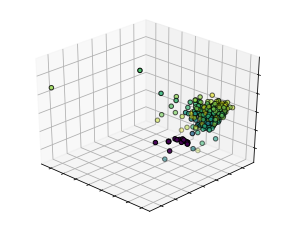

In [135]:
# Instruction 6


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X4 = iris.data
# y = iris.target

X = filtered_graduation_percentage_analysis_df[['Graduates: Percent College Bound', 'Graduates: Percent Non Degree Granting Postsecondary Institution Bound',
                                                                                                                   'Percent of Grade 12 Students Scoring 1550 or Higher on the SAT',
                                                                                                                   'Percent of Grade 12 Students Scoring 22 or Higher on the ACT']].values.tolist()
# print(X)
y = filtered_graduation_percentage_analysis_df['Graduates: Percent Postsecondary Bound'].values.tolist()
# print(y)

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=4)
pca.fit(X)
X = pca.transform(X)
# print(X)

# for name, label in [('Percent College Bound', 0), ('Percent Non Degree Granting Instituion Bound', 1), ('SAT Score', 2), ('ACT Score', 3)]:
#     print("name", name)
#     ax.text3D(X[y == label, 0].mean(),
#               X[y == label, 1].mean(),
#               X[y == label, 2].mean(), name,
#               horizontalalignment='center',
#               bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
# y = np.choose(y, [0, 1, 2, 3]).astype(np.int)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], X[:, 3], c=y,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()


In [136]:
postsecondary_component_analysis_df = people_outcomes_opportunities_highschool_df[['PA School Code_x','nces_schid_x', 'School Name','County_x', 'Enrollment: All Grades. Total.', 'Enrollment: Percent From Low Income Families',
                                                                                'Attendance Rate',
                                                                                'Dropout Rate (Total Dropouts/Dropout Eligible Enrollment)',
                                                                                '4 Year Cohort Graduation Rate: Total',
                                                                                '4 Year Cohort Graduation Rate: Male', 
                                                                                '4 Year Cohort Graduation Rate: Female',
                                                                                'Graduates: Percent College Bound',
                                                                                'Graduates: Percent Specialized Associate Degree Granting Institution Bound',
                                                                                'Graduates: Percent Non Degree Granting Postsecondary Institution Bound',
                                                                                'Graduates: Percent Postsecondary Bound',
                                                                                'CRDC: SAT/ACT Exam Participation. Male. Total.',
                                                                                'CRDC: SAT/ACT Exam Participation. Female. Total.',
                                                                                'Percent of Grade 12 Students Scoring 1550 or Higher on the SAT.',
                                                                                'Percent of Grade 12 Students Scoring 22 or Higher on the ACT',
                                                                                'Safe Schools: Academic Suspensions','Safe Schools: Conduct Suspensions',
                                                                                'Safe Schools: Drug and Alcohol Suspensions',
                                                                                'Safe Schools: Tobacco Suspensions',
                                                                                'Safe Schools: Violence Suspensions',
                                                                                'Safe Schools: Weapons Suspensions',
                                                                                'CRDC: Students Receiving Only One Suspension. Male. Total.',
                                                                                'CRDC: Students Receiving Only One Suspension. Female. Total.',
                                                                                'CRDC: Students Receiving Multiple Suspensions. Male. Total.',
                                                                                'CRDC: Students Receiving Multiple Suspensions. Female. Total.',
                                                                                'CRDC: Number of Algebra I Classes Offered',
                                                                               'CRDC: Number of Geometry Classes Offered',
                                                                               'CRDC: Number of Algebra II Classes Offered',
                                                                               'CRDC: Number of Calculus Classes Offered',
                                                                               'CRDC: Number of Biology Classes Offered',
                                                                               'CRDC: Number of Chemistry Classes Offered',
                                                                               'CRDC: Number of Physics Classes Offered',
                                                                               'CRDC: Number of Different AP Courses Provided',

                                                                               'CRDC: Enrollment in At Least One AP Course. Male. Total.',
                                                                               'CRDC: Enrollment in At Least One AP Course. Female. Total.',
                                                                               'CRDC: Enrollment in Gifted/Talented Program. Male. Total.',
                                                                               'CRDC: Enrollment in Gifted/Talented Program. Female. Total.',
                                                                                   
                                                                               'CRDC: Number of Single-Sex Sports Offered. For Males.',
                                                                               'CRDC: Number of Single-Sex Sports Offered. For Females.',
                                                                               'CRDC: Number of Single-Sex Sports Offered. Total.',
                                                                               'CRDC: Number of Single-Sex Teams Offered. For Males.',
                                                                               'CRDC: Number of Single-Sex Teams Offered. For Females.',
                                                                               'CRDC: Number of Single-Sex Teams Offered. Total.',
                                                                               'CRDC: Number of Participants in Interscholastic Athletics. Male.',
                                                                               'CRDC: Number of Participants in Interscholastic Athletics. Female.',
                                                                               'CRDC: Number of Participants in Interscholastic Athletics. Total.',
                                                                               'Pupil/Teacher Ratio',
                                                                               'CRDC: FTE Teachers Who Are Chronically Absent (10 or More Days)']]


In [137]:
postsecondary_component_analysis_df = postsecondary_component_analysis_df.replace('Missing', 0.0)
postsecondary_component_analysis_df = postsecondary_component_analysis_df.replace('No', 0.0)
postsecondary_component_analysis_df = postsecondary_component_analysis_df.replace('Yes', 1.0)
postsecondary_component_analysis_df = postsecondary_component_analysis_df.replace('Suppressed', 0.0)
postsecondary_component_analysis_df = postsecondary_component_analysis_df.replace('inf', 0.0)

In [138]:
postsecondary_component_analysis_df = postsecondary_component_analysis_df.fillna(0.0)

In [139]:
postsecondary_component_analysis_df.head()

PA School Code_x nces_schid_x               School Name County_x  \
0             6001        06001  ALBERT GALLATIN AREA SHS  Fayette   
1             4818        04818       BROWNSVILLE AREA HS  Fayette   
2             5228        05228    CONNELLSVILLE AREA SHS  Fayette   
3             2126        02126                FRAZIER HS  Fayette   
4             6600        06600      LAUREL HIGHLANDS SHS  Fayette   

   Enrollment: All Grades. Total.  \
0                          1111.0   
1                           480.0   
2                          1162.0   
3                           340.0   
4                           943.0   

  Enrollment: Percent From Low Income Families Attendance Rate  \
0                                         48.9           90.86   
1                                         59.8           86.96   
2                                         52.6           91.18   
3                                         41.9           92.49   
4                                         54.2           90.41   

  Dropout Rate (Total Dropouts/Dropout Eligible Enrollment)  \
0                                                2.2          
1                                                4.4          
2                                                 .2          
3                                                  2          
4                                                2.4          

  4 Year Cohort Graduation Rate: Total 4 Year Cohort Graduation Rate: Male  \
0                                90.18                               90.38   
1                                79.72                               83.33   
2                                69.06                               60.65   
3                                90.24                               86.36   
4                                88.43                               90.57   

  4 Year Cohort Graduation Rate: Female Graduates: Percent College Bound  \
0                                 89.92                            55.09   
1                                 76.62                            64.66   
2                                 77.63                            64.68   
3                                 94.74                            62.34   
4                                 86.36                            72.02   

  Graduates: Percent Specialized Associate Degree Granting Institution Bound  \
0                                               9.81                           
1                                               9.48                           
2                                               3.21                           
3                                                3.9                           
4                                               1.55                           

  Graduates: Percent Non Degree Granting Postsecondary Institution Bound  \
0                                               1.13                       
1                                                  0                       
2                                               5.05                       
3                                               5.19                       
4                                               5.18                       

  Graduates: Percent Postsecondary Bound  \
0                                  56.23   
1                                  64.66   
2                                  69.72   
3                                  67.53   
4                                   77.2   

  CRDC: SAT/ACT Exam Participation. Male. Total.  \
0                                             82   
1                                             28   
2                                             13   
3                                             29   
4                                            177   

  CRDC: SAT/ACT Exam Participation. Female. Total.  \
0                                               99   
1                               

In [140]:
postsecondary_component_analysis_df['CRDC: Percent of Single-Sex Teams Offered. For Males.'] = (postsecondary_component_analysis_df['CRDC: Number of Single-Sex Teams Offered. For Males.'].astype(float) / postsecondary_component_analysis_df['CRDC: Number of Single-Sex Teams Offered. Total.'].astype(float)) * 100

postsecondary_component_analysis_df['CRDC: Percent of Single-Sex Teams Offered. For Females.'] = (postsecondary_component_analysis_df['CRDC: Number of Single-Sex Teams Offered. For Females.'].astype(float) / postsecondary_component_analysis_df['CRDC: Number of Single-Sex Teams Offered. Total.'].astype(float)) * 100

postsecondary_component_analysis_df['CRDC: Percent of Single-Sex Sports Offered. For Males.'] = (postsecondary_component_analysis_df['CRDC: Number of Single-Sex Sports Offered. For Males.'].astype(float) / postsecondary_component_analysis_df['CRDC: Number of Single-Sex Sports Offered. Total.'].astype(float)) * 100

postsecondary_component_analysis_df['CRDC: Percent of Single-Sex Sports Offered. For Females.'] = (postsecondary_component_analysis_df['CRDC: Number of Single-Sex Sports Offered. For Females.'].astype(float) / postsecondary_component_analysis_df['CRDC: Number of Single-Sex Sports Offered. Total.'].astype(float)) * 100

postsecondary_component_analysis_df['CRDC: Percent of Participants in Interscholastic Athletics. Male.'] = (postsecondary_component_analysis_df['CRDC: Number of Participants in Interscholastic Athletics. Male.'].astype(float) / postsecondary_component_analysis_df['CRDC: Number of Participants in Interscholastic Athletics. Total.'].astype(float)) * 100

postsecondary_component_analysis_df['CRDC: Percent of Participants in Interscholastic Athletics. Female.'] = (postsecondary_component_analysis_df['CRDC: Number of Participants in Interscholastic Athletics. Female.'].astype(float) / postsecondary_component_analysis_df['CRDC: Number of Participants in Interscholastic Athletics. Total.'].astype(float)) * 100

postsecondary_component_analysis_df['CRDC: Enrollment in Gifted/Talented Program. Male. Percent.'] = (postsecondary_component_analysis_df['CRDC: Enrollment in Gifted/Talented Program. Male. Total.'].astype(float) / (postsecondary_component_analysis_df['CRDC: Enrollment in Gifted/Talented Program. Male. Total.'].astype(float) + postsecondary_component_analysis_df['CRDC: Enrollment in Gifted/Talented Program. Female. Total.'].astype(float))) * 100

postsecondary_component_analysis_df['CRDC: Enrollment in Gifted/Talented Program. Female. Percent.'] = (postsecondary_component_analysis_df['CRDC: Enrollment in Gifted/Talented Program. Female. Total.'].astype(float) / (postsecondary_component_analysis_df['CRDC: Enrollment in Gifted/Talented Program. Male. Total.'].astype(float) + postsecondary_component_analysis_df['CRDC: Enrollment in Gifted/Talented Program. Female. Total.'].astype(float))) * 100

postsecondary_component_analysis_df['CRDC: Students Receiving Only One Suspension. Male. Percent.'] = (postsecondary_component_analysis_df['CRDC: Students Receiving Only One Suspension. Male. Total.'].astype(float) / (postsecondary_component_analysis_df['CRDC: Students Receiving Only One Suspension. Male. Total.'].astype(float) + postsecondary_component_analysis_df['CRDC: Students Receiving Only One Suspension. Female. Total.'].astype(float))) * 100

postsecondary_component_analysis_df['CRDC: Students Receiving Only One Suspension. Female. Percent.'] = (postsecondary_component_analysis_df['CRDC: Students Receiving Only One Suspension. Female. Total.'].astype(float) / (postsecondary_component_analysis_df['CRDC: Students Receiving Only One Suspension. Male. Total.'].astype(float) + postsecondary_component_analysis_df['CRDC: Students Receiving Only One Suspension. Female. Total.'].astype(float))) * 100

postsecondary_component_analysis_df['CRDC: Students Receiving Multiple Suspensions. Male. Percent.'] = (postsecondary_component_analysis_df['CRDC: Students Receiving Multiple Suspensions. Male. Total.'].astype(float) / (postsecondary_component_analysis_df['CRDC: Students Receiving Multiple Suspensions. Male. Total.'].astype(float) + postsecondary_component_analysis_df['CRDC: Students Receiving Multiple Suspensions. Female. Total.'].astype(float))) * 100

postsecondary_component_analysis_df['CRDC: Students Receiving Multiple Suspensions. Female. Percent.'] = (postsecondary_component_analysis_df['CRDC: Students Receiving Multiple Suspensions. Female. Total.'].astype(float) / (postsecondary_component_analysis_df['CRDC: Students Receiving Multiple Suspensions. Male. Total.'].astype(float) + postsecondary_component_analysis_df['CRDC: Students Receiving Multiple Suspensions. Female. Total.'].astype(float))) * 100

postsecondary_component_analysis_df['CRDC: Enrollment in At Least One AP Course. Male. Percent.'] = (postsecondary_component_analysis_df['CRDC: Enrollment in At Least One AP Course. Male. Total.'].astype(float) / (postsecondary_component_analysis_df['CRDC: Enrollment in At Least One AP Course. Male. Total.'].astype(float) + postsecondary_component_analysis_df['CRDC: Enrollment in At Least One AP Course. Female. Total.'].astype(float))) * 100

postsecondary_component_analysis_df['CRDC: Enrollment in At Least One AP Course. Female. Percent.'] = (postsecondary_component_analysis_df['CRDC: Enrollment in At Least One AP Course. Female. Total.'].astype(float) / (postsecondary_component_analysis_df['CRDC: Enrollment in At Least One AP Course. Male. Total.'].astype(float) + postsecondary_component_analysis_df['CRDC: Enrollment in At Least One AP Course. Female. Total.'].astype(float))) * 100

postsecondary_component_analysis_df['CRDC: Students Receiving Multiple Suspensions. Total.'] = postsecondary_component_analysis_df['CRDC: Students Receiving Multiple Suspensions. Male. Total.'].astype(float) + postsecondary_component_analysis_df['CRDC: Students Receiving Multiple Suspensions. Female. Total.'].astype(float)

postsecondary_component_analysis_df['CRDC: Students Receiving Only One Suspension. Total.'] = postsecondary_component_analysis_df['CRDC: Students Receiving Only One Suspension. Male. Total.'].astype(float) + postsecondary_component_analysis_df['CRDC: Students Receiving Only One Suspension. Female. Total.'].astype(float)

postsecondary_component_analysis_df['Safe Schools: Total Suspensions'] = postsecondary_component_analysis_df['Safe Schools: Academic Suspensions'].astype(float) + postsecondary_component_analysis_df['Safe Schools: Conduct Suspensions'].astype(float) + postsecondary_component_analysis_df['Safe Schools: Drug and Alcohol Suspensions'].astype(float) + postsecondary_component_analysis_df['Safe Schools: Tobacco Suspensions'].astype(float) + postsecondary_component_analysis_df['Safe Schools: Violence Suspensions'].astype(float) + postsecondary_component_analysis_df['Safe Schools: Weapons Suspensions'].astype(float)


In [141]:
postsecondary_component_analysis_df = postsecondary_component_analysis_df[['PA School Code_x', 'School Name', 'County_x',
       'Enrollment: All Grades. Total.',
       'Enrollment: Percent From Low Income Families', 'Attendance Rate',
       'Dropout Rate (Total Dropouts/Dropout Eligible Enrollment)',
       '4 Year Cohort Graduation Rate: Total',
       '4 Year Cohort Graduation Rate: Male',
       '4 Year Cohort Graduation Rate: Female',
       'Graduates: Percent College Bound',
       'Graduates: Percent Specialized Associate Degree Granting Institution Bound',
       'Graduates: Percent Non Degree Granting Postsecondary Institution Bound',
       'CRDC: SAT/ACT Exam Participation. Male. Total.',
       'CRDC: SAT/ACT Exam Participation. Female. Total.',
       'Percent of Grade 12 Students Scoring 1550 or Higher on the SAT.',
       'Percent of Grade 12 Students Scoring 22 or Higher on the ACT',
       'Safe Schools: Academic Suspensions',
       'Safe Schools: Conduct Suspensions',
       'Safe Schools: Drug and Alcohol Suspensions',
       'Safe Schools: Tobacco Suspensions',
       'Safe Schools: Violence Suspensions',
       'Safe Schools: Weapons Suspensions',
       'Safe Schools: Total Suspensions',
       'CRDC: Students Receiving Only One Suspension. Male. Total.',
       'CRDC: Students Receiving Only One Suspension. Female. Total.',
       'CRDC: Students Receiving Only One Suspension. Total.',
       'CRDC: Students Receiving Only One Suspension. Male. Percent.',
       'CRDC: Students Receiving Only One Suspension. Female. Percent.',
       'CRDC: Students Receiving Multiple Suspensions. Male. Total.',
       'CRDC: Students Receiving Multiple Suspensions. Female. Total.',
       'CRDC: Students Receiving Multiple Suspensions. Total.',
       'CRDC: Students Receiving Multiple Suspensions. Male. Percent.',
       'CRDC: Students Receiving Multiple Suspensions. Female. Percent.',
       'CRDC: Number of Algebra I Classes Offered',
       'CRDC: Number of Geometry Classes Offered',
       'CRDC: Number of Algebra II Classes Offered',
       'CRDC: Number of Calculus Classes Offered',
       'CRDC: Number of Biology Classes Offered',
       'CRDC: Number of Chemistry Classes Offered',
       'CRDC: Number of Physics Classes Offered',
       'CRDC: Number of Different AP Courses Provided',
       'CRDC: Enrollment in At Least One AP Course. Male. Total.',
       'CRDC: Enrollment in At Least One AP Course. Female. Total.',
       'CRDC: Enrollment in Gifted/Talented Program. Male. Total.',
       'CRDC: Enrollment in Gifted/Talented Program. Female. Total.',
       'CRDC: Enrollment in Gifted/Talented Program. Male. Percent.',
       'CRDC: Enrollment in Gifted/Talented Program. Female. Percent.',
       'CRDC: Enrollment in At Least One AP Course. Male. Percent.',
       'CRDC: Enrollment in At Least One AP Course. Female. Percent.',
       'CRDC: Number of Single-Sex Sports Offered. For Males.',
       'CRDC: Number of Single-Sex Sports Offered. For Females.',
       'CRDC: Number of Single-Sex Sports Offered. Total.',
       'CRDC: Percent of Single-Sex Sports Offered. For Males.',
       'CRDC: Percent of Single-Sex Sports Offered. For Females.',
       'CRDC: Number of Single-Sex Teams Offered. For Males.',
       'CRDC: Number of Single-Sex Teams Offered. For Females.',
       'CRDC: Number of Single-Sex Teams Offered. Total.',
       'CRDC: Percent of Single-Sex Teams Offered. For Males.',
       'CRDC: Percent of Single-Sex Teams Offered. For Females.',
       'CRDC: Number of Participants in Interscholastic Athletics. Male.',
       'CRDC: Number of Participants in Interscholastic Athletics. Female.',
       'CRDC: Number of Participants in Interscholastic Athletics. Total.',
       'CRDC: Percent of Participants in Interscholastic Athletics. Male.',
       'CRDC: Percent of Participants in Interscholastic Athletics. Female.',
       'Pupil/Teacher Ratio',
       'CRDC: FTE Teachers Who Are Chronically Absent (10 or More Days)',
       'Graduates: Percent Postsecondary Bound',
]]
postsecondary_component_analysis_df = postsecondary_component_analysis_df.fillna(0).fillna(0)

In [142]:
postsecondary_component_analysis_df.shape
 
       

(607, 68)

In [1236]:
# np.mean(postsecondary_component_analysis_df['Graduates: Percent Postsecondary Bound'])

In [1237]:
# graduates_percent_postsecondary_bound_counts_df = graduates_percent_postsecondary_bound.value_counts(bins=4)
# graduates_percent_postsecondary_bound_df = postsecondary_component_analysis_df['Graduates: Percent Postsecondary Bound']

In [143]:
postsecondary_component_analysis_df['Graduates: Postsecondary Bound Quartile'] = pd.qcut(postsecondary_component_analysis_df['Graduates: Percent Postsecondary Bound'].astype(float), 8, labels=False)

In [144]:
postsecondary_component_analysis_df['Graduates: Postsecondary Bound Quartile'] = postsecondary_component_analysis_df['Graduates: Postsecondary Bound Quartile'] + 1

In [145]:
postsecondary_component_analysis_df = postsecondary_component_analysis_df.replace(np.inf, 0)

In [146]:
postsecondary_component_analysis_df.shape

(607, 69)

In [506]:
S_W = np.zeros((63,63))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((63,63))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(63,1), mv.reshape(63,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

# S_W = S_W.replace('NaN', 0)

# S_W = S_W.replace('inf', 0)

overall_mean = np.mean(X, axis=0)

S_B = np.zeros((63,63))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(63,1) # make column vector
    overall_mean = overall_mean.reshape(63,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

# for i in S_B:
#     print(i)

# S_B = S_B.replace('NaN', 0)
# S_B = S_B.replace('inf', 0)


within-class Scatter Matrix:
 [[ 5.66001605e+07  1.52418026e+04  2.46557556e+05 ...  4.63585056e+05
   2.96183365e+05  1.87944919e+05]
 [ 1.52418026e+04  6.50354182e+04 -1.28067212e+04 ...  1.69216183e+03
  -1.35137408e+04 -8.05345500e+02]
 [ 2.46557556e+05 -1.28067212e+04  4.97302211e+04 ...  1.49807142e+04
   2.08144042e+04  1.26498690e+04]
 ...
 [ 4.63585056e+05  1.69216183e+03  1.49807142e+04 ...  9.05557639e+04
   4.19304840e+04 -5.53928577e+03]
 [ 2.96183365e+05 -1.35137408e+04  2.08144042e+04 ...  4.19304840e+04
   6.95306365e+04  9.84154194e+02]
 [ 1.87944919e+05 -8.05345500e+02  1.26498690e+04 ... -5.53928577e+03
   9.84154194e+02  1.07297617e+05]]
between-class Scatter Matrix:
 [[ 1.02819364e+07 -5.88039566e+05  1.01030392e+05 ...  1.63035713e+05
   6.52196797e+04 -8.63101776e+04]
 [-5.88039566e+05  6.47381372e+04 -1.81639279e+04 ... -2.16288698e+04
  -1.16239423e+04  2.00370575e+04]
 [ 1.01030392e+05 -1.81639279e+04  6.14726284e+03 ...  7.07338520e+03
   4.07515773e+03 -7.20

In [507]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(63,1)   
#     print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
#     print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


In [508]:
postsecondary_component_analysis_df = postsecondary_component_analysis_df.sort_values('County_x')

In [509]:
postsecondary_component_analysis_df.head()

PA School Code_x           School Name County_x  \
250             0003  BERMUDIAN SPRINGS HS    Adams   
252             6269     FAIRFIELD AREA HS    Adams   
253             6271    GETTYSBURG AREA HS    Adams   
254             0014       LITTLESTOWN SHS    Adams   
255             0021        BIGLERVILLE HS    Adams   

     Enrollment: All Grades. Total.  \
250                           638.0   
252                           337.0   
253                           940.0   
254                           566.0   
255                           524.0   

    Enrollment: Percent From Low Income Families Attendance Rate  \
250                                         37.9           92.76   
252                                         19.4           93.51   
253                                         36.6            93.3   
254                                         31.1           93.68   
255                                         51.9           94.19   

    Dropout Rate (Total Dropouts/Dropout Eligible Enrollment)  \
250                                                 .6          
252                                                2.7          
253                                                1.2          
254                                                1.8          
255                                                1.7          

    4 Year Cohort Graduation Rate: Total 4 Year Cohort Graduation Rate: Male  \
250                                96.82                               96.51   
252                                93.81                                90.2   
253                                92.74                                91.3   
254                                 86.9                               81.82   
255                                94.21                               95.59   

    4 Year Cohort Graduation Rate: Female Graduates: Percent College Bound  \
250                                 97.18                             58.6   
252                                 97.83                            65.22   
253                                 94.12                            78.51   
254                                 92.65                            57.14   
255                                 92.45                            73.95   

    Graduates: Percent Specialized Associate Degree Granting Institution Bound  \
250                                               4.46                           
252                                               1.09                           
253                                               4.82                           
254                                               5.26                           
255                                               2.52                           

    Graduates: Percent Non Degree Granting Postsecondary Institution Bound  \
250                                               2.55                       
252                                               7.61                       
253                                                .44                       
254                                               5.26                       
255                                                .84                       

    CRDC: SAT/ACT Exam Participation. Male. Total.  \
250                                             43   
252                                             22   
253                                             89   
254                                             29   
255                                             45   

    CRDC: SAT/ACT Exam Participation. Female. Total.  \
250                                               65   
252                                               35   
253                                               91   
254                                               32   
255                                               54   

     Percent of Grade 12 Students Scoring 1550 or Higher on the 

In [510]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

35321826596.389946
2771649.895230423
2771649.895230423
446800.9409582784
446800.9409582784
136088.17927614378
136016.74922614888
76.57212903650542
1.3024493985691934
0.35832881434392067
0.35832881434392067
0.20592459255562448
0.20592459255562448
0.11825000545089469
0.11825000545089469
0.11551001893013035
0.11551001893013035
0.11185263948029088
0.11185263948029088
0.11169686768031273
0.11169686768031273
0.07658393191969319
0.05815753489261028
0.05815753489261028
0.04393186483393357
0.03140545154391935
0.027735144741316328
0.02288586736642047
0.02288586736642047
0.013446071856025673
0.013122086646881647
0.013122086646881647
0.009857294159631932
0.009857294159631932
0.008288098857876723
0.008288098857876723
0.006058009003113637
0.006058009003113637
0.00550738730647345
0.0029799579749857407
0.002749881061709074
0.002749881061709074
0.00210748659025302
0.00210748659025302
0.0015386910286509998
0.0003005390372562781
0.0003005390372562781
6.305757549550039e-0

In [511]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: -100.00%
eigenvalue 2: -0.01%
eigenvalue 3: -0.01%
eigenvalue 4: -0.00%
eigenvalue 5: -0.00%
eigenvalue 6: -0.00%
eigenvalue 7: -0.00%
eigenvalue 8: -0.00%
eigenvalue 9: -0.00%
eigenvalue 10: -0.00%
eigenvalue 11: -0.00%
eigenvalue 12: -0.00%
eigenvalue 13: -0.00%
eigenvalue 14: -0.00%
eigenvalue 15: -0.00%
eigenvalue 16: -0.00%
eigenvalue 17: -0.00%
eigenvalue 18: -0.00%
eigenvalue 19: -0.00%
eigenvalue 20: -0.00%
eigenvalue 21: -0.00%
eigenvalue 22: -0.00%
eigenvalue 23: -0.00%
eigenvalue 24: -0.00%
eigenvalue 25: -0.00%
eigenvalue 26: -0.00%
eigenvalue 27: -0.00%
eigenvalue 28: -0.00%
eigenvalue 29: -0.00%
eigenvalue 30: -0.00%
eigenvalue 31: -0.00%
eigenvalue 32: -0.00%
eigenvalue 33: -0.00%
eigenvalue 34: -0.00%
eigenvalue 35: -0.00%
eigenvalue 36: -0.00%
eigenvalue 37: -0.00%
eigenvalue 38: -0.00%
eigenvalue 39: -0.00%
eigenvalue 40: -0.00%
eigenvalue 41: -0.00%
eigenvalue 42: -0.00%
eigenvalue 43: -0.00%
eigenvalue 44: -0.00%
eigenvalue 45: -0.

In [512]:
W = np.hstack((eig_pairs[0][1].reshape(63,1), eig_pairs[1][1].reshape(63,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[-8.54573952e-17 -1.11910273e-16]
 [ 2.49794836e-15 -1.40045228e-15]
 [ 6.99002157e-15  7.85730647e-15]
 [ 2.80097800e-14  3.41927604e-14]
 [ 1.04306171e-14  1.23739875e-14]
 [ 4.68073518e-15  2.60809013e-15]
 [-1.44655006e-14 -1.67903038e-14]
 [-1.57932237e-14 -1.71379365e-14]
 [-5.93302260e-14 -1.09399232e-13]
 [ 2.66041440e-14  1.79329331e-14]
 [ 2.26656680e-16  1.96029211e-15]
 [-2.07038821e-15 -2.53133979e-15]
 [-4.34819112e-15 -7.16478807e-15]
 [-1.55090564e-15 -6.04930566e-16]
 [-1.19419071e-02 -1.00528084e-02]
 [-1.19419071e-02 -1.00528084e-02]
 [-1.19419071e-02 -1.00528084e-02]
 [-1.19419071e-02 -1.00528084e-02]
 [-1.19419071e-02 -1.00528084e-02]
 [-1.19419071e-02 -1.00528084e-02]
 [ 1.19419071e-02  1.00528084e-02]
 [ 3.73742402e-01  4.79471767e-01]
 [ 3.73742402e-01  4.79471767e-01]
 [-3.73742402e-01 -4.79471767e-01]
 [ 6.70206031e-16  1.10343122e-15]
 [-7.86192705e-16 -2.82237724e-15]
 [ 2.55650513e-01  3.09970901e-01]
 [ 2.55650513e-01  3.09970901e-01]
 [-2.5565

In [513]:
from statistics import mean, median

# somelist =  [1,12,2,53,23,6,17]
# avg_value = mean(somelist)
# median_value = median(somelist)

X_lda = X.dot(W)
# assert X_lda.shape == (62,2), "The matrix is not 150x2 dimensional."



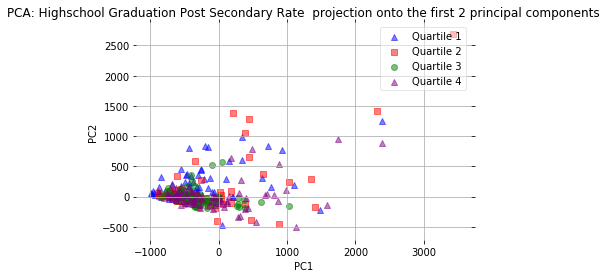

In [515]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
X_pca = sklearn_pca.fit_transform(X)


ax = plt.subplot(111)

for label,marker,color in zip(
range(1,5),('^', 's', 'o', '^'),('blue', 'red', 'green', 'purple')):

    plt.scatter(x=X_pca[:,0][y == label],
            y=X_pca[:,1][y == label],
            marker=marker,
            color=color,
            alpha=0.5,
            label=label_dict[label]
            )

plt.xlabel('PC1')
plt.ylabel('PC2')

leg = plt.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.5)
plt.title('PCA: Highschool Graduation Post Secondary Rate  projection onto the first 2 principal components')

# hide axis ticks
plt.tick_params(axis="both", which="both", bottom="off", top="off",  
        labelbottom="on", left="off", right="off", labelleft="on")
# remove axis spines
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)    

plt.tight_layout
plt.grid()

plt.show()

DecisionTree with features [3, 4] has a score of 0.9934102141680395
RandomForest with 30 estimators with features [3, 4] has a score of 0.9917627677100495


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


ExtraTrees with 30 estimators with features [3, 4] has a score of 0.9934102141680395


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


AdaBoost with 30 estimators with features [3, 4] has a score of 0.38879736408566723


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


DecisionTree with features [3, 5] has a score of 1.0
RandomForest with 30 estimators with features [3, 5] has a score of 0.9967051070840197


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


ExtraTrees with 30 estimators with features [3, 5] has a score of 1.0


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


AdaBoost with 30 estimators with features [3, 5] has a score of 0.38879736408566723


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


DecisionTree with features [3, 6] has a score of 0.9901153212520593
RandomForest with 30 estimators with features [3, 6] has a score of 0.9802306425041186


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


ExtraTrees with 30 estimators with features [3, 6] has a score of 0.9901153212520593


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


AdaBoost with 30 estimators with features [3, 6] has a score of 0.4135090609555189


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


DecisionTree with features [3, 7] has a score of 1.0
RandomForest with 30 estimators with features [3, 7] has a score of 1.0


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


ExtraTrees with 30 estimators with features [3, 7] has a score of 1.0


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


AdaBoost with 30 estimators with features [3, 7] has a score of 0.4135090609555189


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


DecisionTree with features [4, 7] has a score of 1.0
RandomForest with 30 estimators with features [4, 7] has a score of 0.9967051070840197


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


ExtraTrees with 30 estimators with features [4, 7] has a score of 1.0


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


AdaBoost with 30 estimators with features [4, 7] has a score of 0.3871499176276771


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


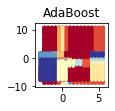

In [516]:
# Instruction 8


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import clone
from sklearn.datasets import load_iris
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 5
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

# Load data
iris = load_iris()

plot_idx = 1

models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                             n_estimators=n_estimators)]

for pair in ([3, 4], [3, 5], [3, 6], [3, 7], [4, 7]):
    for model in models:
        # We only take the two corresponding features
#         X = iris.data[:, pair]
#         y = iris.target
        X = postsecondary_component_analysis_df.iloc[:,pair].values.astype(float)
        y = postsecondary_component_analysis_df.iloc[:,68].values.astype(float)
#         print(y)


        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        clf = clone(model)
        clf = model.fit(X, y)

        scores = clf.score(X, y)
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(
            ".")[-1][:-2][:-len("Classifier")]

        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(
                len(model.estimators_))
        print(model_details + " with features", pair,
              "has a score of", scores)

        plt.subplot(3, 4, plot_idx)
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        # Plot either a single DecisionTreeClassifier or alpha blend the
        # decision surfaces of the ensemble of classifiers
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            # Choose alpha blend level with respect to the number
            # of estimators
            # that are in use (noting that AdaBoost can use fewer estimators
            # than its maximum if it achieves a good enough fit early on)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        # Build a coarser grid to plot a set of ensemble classifications
        # to show how these are different to what we see in the decision
        # surfaces. These points are regularly space and do not have a
        # black outline
        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                         yy_coarser.ravel()]
                                         ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                                c=Z_points_coarser, cmap=cmap,
                                edgecolors="none")
        

In [517]:
# Instruction 9

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
# print("X1",X)
# print(postsecondary_component_analysis_df.iloc[:,3:65].head())
X = postsecondary_component_analysis_df.iloc[:,3:11].values.astype(float)
y = postsecondary_component_analysis_df.iloc[:,68].values.astype(float)
print("X2",X.shape)

X = X[y != 0, :2]
y = y[y != 0]
print("X2",X.shape)
print("Y2",y.shape)

# print(y)

n_sample = len(X) 
print(n_sample)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)
print(y.shape)
print(X.shape)
X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
# print(y_test)
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

X2 (607, 8)
X2 (607, 2)
Y2 (607,)
607
(607,)
(607, 2)


In [518]:
# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], zorder=10, cmap=plt.cm.Paired,
                edgecolor='k')

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], facecolors='none',
                zorder=10, edgecolor='k')
    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    
    
    print("x_max",x_max)

    print("y_max",y_max)
    
    print("x_min",x_min)
    
    print("y_min",y_min)

    print('fig_num', fig_num)
# >>> x1, y1 = np.meshgrid(np.arange(1, 11, 2), np.arange(-12, -3, 3))
# >>> x2, y2 = np.mgrid[1:11:2, -12:-3:3]


    XX, YY = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))    
    print(XX.shape)
#     XX, YY = np.meshgrid(np.arange(x_min, x_max, 200j), np.arange(y_min, y_max, 200j), sparse=True)

    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    print(XX.shape)
    print(XX.shape[1])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape[0], XX.shape[1], 8)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()


KeyboardInterrupt: 

In [ ]:
# Instruction 11:


import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.feature_selection import SelectPercentile, f_classif

# #############################################################################
# Import some data to play with

# The iris dataset
# iris = datasets.load_iris()

X1 = postsecondary_component_analysis_df.iloc[:,3:68].values.astype(float)

print(X1.shape)

# Some noisy data not correlated
E = np.random.uniform(0, 0.1, size=(len(X1), 6))
print(E.shape)

# Add the noisy data to the informative features
X = np.hstack((X1, E))

y = postsecondary_component_analysis_df.iloc[:,68].values.astype(float)
plt.figure(figsize=(25, 5))

plt.figure(1)
plt.clf()

X_indices = np.arange(X1.shape[-1])
# print(X_indices, scores)

# #############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function: the 10% most significant features
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X1, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.4,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')
scores.shape

In [ ]:
# Compare to the weights of an SVM

clf = svm.SVC(kernel='linear')
clf.fit(X, y)

svm_weights = (clf.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()
plt.figure(figsize=(25, 5))
plt.bar(X_indices - .20, svm_weights, width=.3, label='SVM weight',
        color='navy', edgecolor='black')

clf_selected = svm.SVC(kernel='linear')
clf_selected.fit(selector.transform(X), y)

svm_weights_selected = (clf_selected.coef_ ** 2).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.3, label='SVM weights after selection', color='c',
        edgecolor='black')

plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

In [ ]:
X, y = postsecondary_component_analysis_df.iloc[:,4:64].values.astype(float), postsecondary_component_analysis_df.iloc[:,65].values.astype(float)

In [ ]:
# Instruction 10:

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# Load the boston dataset.
boston = load_boston()
# X, y = boston['data'], boston['target']
X, y = postsecondary_component_analysis_df.iloc[:,3:67].values.astype(float), postsecondary_component_analysis_df.iloc[:,68].values.astype(float)
# print('X', postsecondary_component_analysis_df.head())
# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
clf = LassoCV(cv=5)

# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf)
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]
# print('n_features', n_features)

# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
X_transform = sfm.transform(X)
# print('X_transform',X_transform)
n_features = X_transform.shape[1]



# Plot the selected two features from X.
plt.title(
    "Features selected from Boston using SelectFromModel")
feature1 = X_transform[:, 2]
feature2 = y[:] 
# print(feature1)
# print(feature2)
plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

In [ ]:
# Instruction 12:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# import some data to play with
iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features.
# y = np.array(iris.target, dtype=int)

X = postsecondary_component_analysis_df.iloc[:,4:6].values.astype(float)  # we only take the first two features.
y = postsecondary_component_analysis_df.iloc[:,68].values.astype(int)

print(X.shape)
print(np.mean(y))

h = .2  # step size in the mesh

kernel = 1.0 * RBF([1.0])
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)
kernel = 1.0 * RBF([1.0, 1.0])
gpc_rbf_anisotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)

In [ ]:
# create a mesh to plot in
print(X)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
print('x_min, x_max', x_min, x_max)

y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
print('y_min, y_max', y_min, y_max)

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

print(xx)
print(xx.shape[0], xx.shape[1])

titles = ["Isotropic RBF", "Anisotropic RBF"]
plt.figure(figsize=(10, 5))
for i, clf in enumerate((gpc_rbf_isotropic, gpc_rbf_anisotropic)):
    # Plot the predicted probabilities. For that, we will assign a color to
    # each point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(1, 2, i + 1)
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    print('Z', Z)
    print(Z.shape)
    # Put the result into a color plot
    Z = Z.reshape(xx.shape[0], xx.shape[1], 4)
    plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=np.array(["r", "g", "b", "y"])[y-1],
                edgecolors=(0, 0, 0, 0))
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title("%s, LML: %.3f" %
              (titles[i], clf.log_marginal_likelihood(clf.kernel_.theta)))

plt.tight_layout()
plt.show()

In [447]:
linear_models_analysis_academic_suspensions_vs_pupil_teacher_ratio_df = postsecondary_component_analysis_df[['CRDC: Students Receiving Only One Suspension. Total.', 'Pupil/Teacher Ratio']].values.astype(float)


In [448]:
postsecondary_bound_quartile_df = postsecondary_component_analysis_df[['Graduates: Postsecondary Bound Quartile']].values

/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


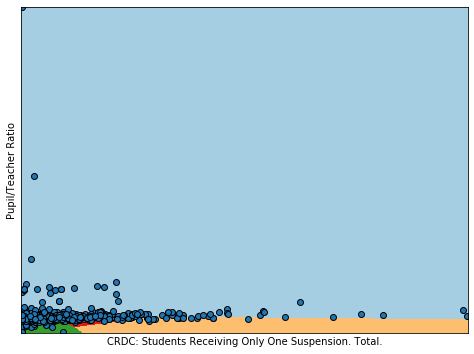

In [449]:
# Instruction 13:

# print(postsecondary_bound_quartile_df)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features.
# Y = iris.target

# X1 = postsecondary_component_analysis_df['Safe Schools: Academic Suspensions','Pupil/Teacher Ratio'].values.astype(float)


X = linear_models_analysis_academic_suspensions_vs_pupil_teacher_ratio_df  # we only take the first two features.
Y = postsecondary_bound_quartile_df

# print(Y1)
# print(Y)
h = .1
# step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('CRDC: Students Receiving Only One Suspension. Total.')
plt.ylabel('Pupil/Teacher Ratio')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

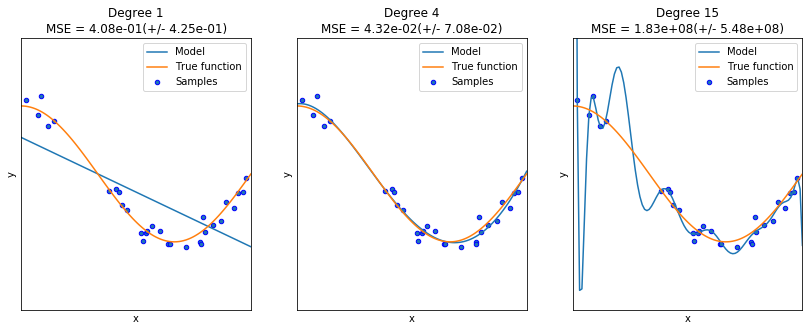

In [451]:
# Instruction 14:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

In [442]:
# Instruction 15:


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 45

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
# X = iris.data[:, :2]
# y = iris.target
X = linear_models_analysis_academic_suspensions_vs_pupil_teacher_ratio_df  # we only take the first two features.
y = postsecondary_bound_quartile_df
print(y.shape)
print(X)

NameError: name 'linear_models_analysis_academic_suspensions_vs_pupil_teacher_ratio_df' is not defined

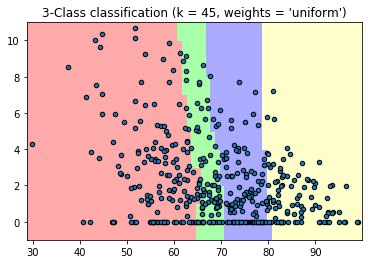

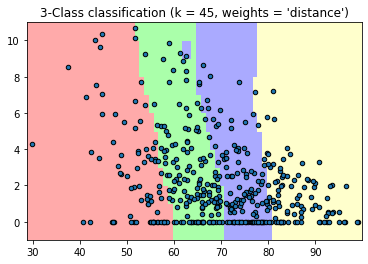

In [456]:
h = 1  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFCC'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#CCCC00'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) re

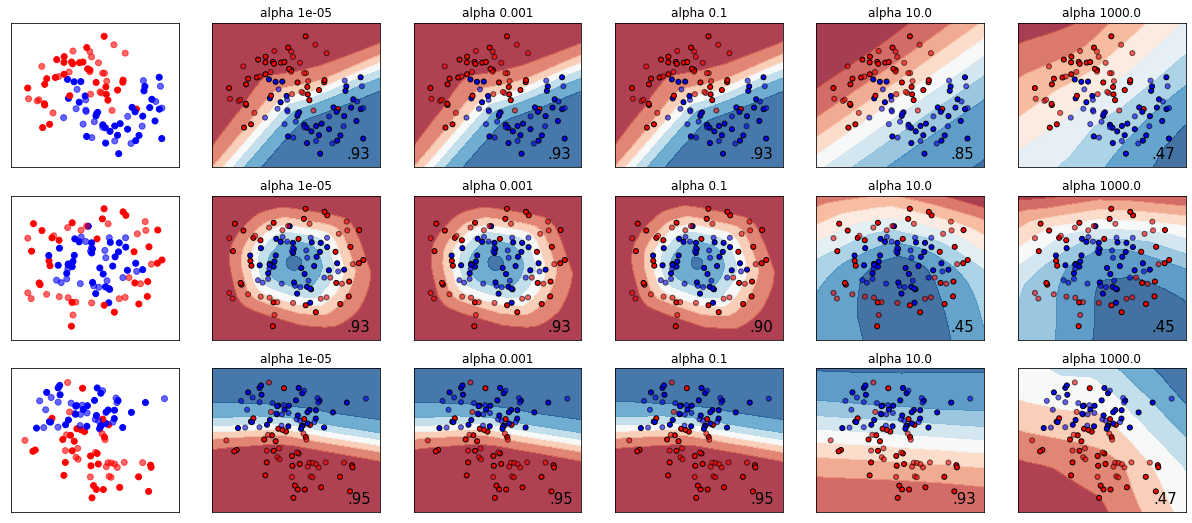

In [457]:
# Instruction 16:


import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier

h = .02  # step size in the mesh

alphas = np.logspace(-5, 3, 5)
names = []
for i in alphas:
    names.append('alpha ' + str(i))

classifiers = []
for i in alphas:
    classifiers.append(MLPClassifier(alpha=i, random_state=1))

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # preprocess dataset, split into training and test part
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='black', s=25)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6, edgecolors='black', s=25)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

Automatically created module for IPython interactive environment

Prediction accuracy for the normal test dataset with PCA
81.48%


Prediction accuracy for the standardized test dataset with PCA
98.15%


PC 1 without scaling:
 [ 1.76342917e-03 -8.35544737e-04  1.54623496e-04 -5.31136096e-03
  2.01663336e-02  1.02440667e-03  1.53155502e-03 -1.11663562e-04
  6.31071580e-04  2.32645551e-03  1.53606718e-04  7.43176482e-04
  9.99775716e-01]

PC 1 with scaling:
 [ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
  0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
  0.27507157]


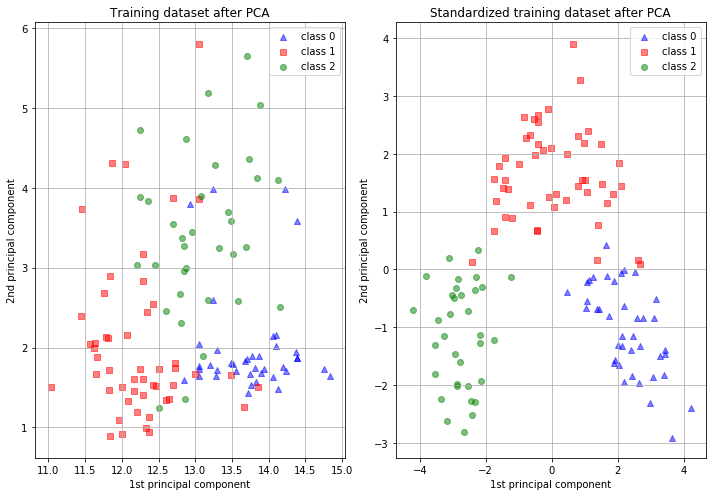

In [458]:
# Instruction 17:


from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
print(__doc__)

# Code source: Tyler Lanigan <tylerlanigan@gmail.com>
#              Sebastian Raschka <mail@sebastianraschka.com>

# License: BSD 3 clause

RANDOM_STATE = 42
FIG_SIZE = (10, 7)


features, target = load_wine(return_X_y=True)

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)

# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))

# Extract PCA from pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

# Show first principal componenets
print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 1 with scaling:\n', pca_std.components_[0])

# Scale and use PCA on X_train data for visualization.
scaler = std_clf.named_steps['standardscaler']
X_train_std = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)


for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train == l, 0], X_train[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train == l, 0], X_train_std[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )
ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

In [ ]:
# Instruction 19:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.semi_supervised import label_propagation

rng = np.random.RandomState(0)

iris = datasets.load_iris()

X = linear_models_analysis_academic_suspensions_vs_pupil_teacher_ratio_df  # we only take the first two features.
y = postsecondary_bound_quartile_df

In [ ]:
# step size in the mesh
h = 1

y_30 = np.copy(y)
y_30[rng.rand(len(y)) < 0.3] = -1
y_50 = np.copy(y)
y_50[rng.rand(len(y)) < 0.5] = -1
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
ls30 = (label_propagation.LabelSpreading().fit(X, y_30),
        y_30)
ls50 = (label_propagation.LabelSpreading().fit(X, y_50),
        y_50)
ls100 = (label_propagation.LabelSpreading().fit(X, y), y)
rbf_svc = (svm.SVC(kernel='rbf').fit(X, y), y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['Label Spreading 30% data',
          'Label Spreading 50% data',
          'Label Spreading 100% data',
          'SVC with rbf kernel']
color_map = {-1: (1, 1, 1), 0: (0, 0, .9), 1: (1, 0, 0), 2: (.8, .6, 0)}

for i, (clf, y_train) in enumerate((ls30, ls50, ls100, rbf_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis('off')

    # Plot also the training points
#     colors = [color_map[y] for y in y_train]
    plt.scatter(X[:, 0], X[:, 1], edgecolors='black')

    plt.title(titles[i])

plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()

In [ ]:
# Instruction 20:


import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=1):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [ ]:
# import some data to play with
# iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
# X = iris.data[:, :2]
# y = iris.target

X = linear_models_analysis_academic_suspensions_vs_pupil_teacher_ratio_df  # we only take the first two features.
y = postsecondary_bound_quartile_df

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=4, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [ ]:
# Instruction 21:


import numpy as np
import matplotlib.pyplot as plt

# from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.1

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[3, 4], [3, 5], [3, 6],
                                [4, 5], [4, 6], [5, 6]]):
    # We only take the two corresponding features
#     X = iris.data[:, pair]
#     y = iris.target

    X = postsecondary_component_analysis_df.iloc[:,pair].values.astype(float)
    y = postsecondary_bound_quartile_df


    # Train
    clf = DecisionTreeClassifier().fit(X, y)
    plt.figure(figsize=(25, 5))

    # Plot the decision boundary
    plt.subplot(2, 4, pairidx + 1)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

#     plt.xlabel(iris.feature_names[pair[0]])
#     plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
        
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

In [1173]:
postsecondary_component_analysis_df.shape

(607, 69)

In [1251]:
# postsecondary_component_analysis_df.columns.values

In [1299]:
# from scipy import stats
# import numpy as np
# z = np.abs(stats.zscore(postsecondary_component_analysis_df.iloc[:,3:63].values.astype(float)))
# print(z)

# threshold = 3
# print(np.where(z > 3))

In [1300]:
# postsecondary_component_analysis_df = postsecondary_component_analysis_df[(z<3).all(axis=1)]
# Q1 = postsecondary_component_analysis_df.quantile(0.25)
# Q3 = postsecondary_component_analysis_df.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

# postsecondary_component_analysis_df = postsecondary_component_analysis_df[~((postsecondary_component_analysis_df < (Q1 - 1.5 * IQR)) |(postsecondary_component_analysis_df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [1301]:
# postsecondary_component_analysis_df['Graduates: Postsecondary Bound Quartile'] = pd.qcut(postsecondary_component_analysis_df['Graduates: Percent Postsecondary Bound'].astype(float), 10, labels=False)

In [1096]:
# postsecondary_component_analysis_df.iloc[:,3:66]

In [543]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
# X=postsecondary_component_analysis_df.iloc[:,3:]
iris = load_iris()
X = postsecondary_component_analysis_df.iloc[:,3:66].values.astype(float)
y = postsecondary_component_analysis_df.iloc[:,68].values.astype(float)
print(y)
knn = KNeighborsClassifier(n_neighbors=4)

[3. 5. 6. 3. 5. 4. 5. 7. 8. 8. 4. 8. 7. 2. 7. 8. 7. 1. 5. 1. 5. 6. 8. 7.
 1. 3. 6. 5. 8. 8. 1. 8. 7. 6. 8. 8. 7. 4. 6. 3. 8. 5. 8. 8. 8. 3. 3. 8.
 6. 8. 8. 6. 8. 5. 2. 4. 7. 7. 7. 1. 4. 3. 7. 6. 4. 3. 5. 4. 6. 7. 6. 3.
 4. 7. 5. 7. 7. 5. 3. 2. 2. 2. 2. 4. 6. 5. 6. 4. 6. 1. 6. 3. 6. 5. 6. 7.
 8. 2. 6. 3. 6. 5. 2. 2. 2. 2. 3. 5. 3. 1. 3. 1. 1. 5. 5. 2. 2. 2. 3. 3.
 7. 8. 8. 7. 4. 6. 7. 8. 8. 4. 8. 7. 7. 8. 6. 8. 7. 5. 7. 1. 6. 7. 3. 6.
 2. 4. 3. 2. 1. 4. 7. 3. 3. 4. 4. 6. 2. 8. 6. 8. 2. 7. 7. 4. 4. 2. 8. 8.
 8. 7. 6. 8. 8. 8. 6. 5. 8. 8. 8. 8. 8. 8. 4. 7. 3. 5. 5. 4. 2. 2. 4. 3.
 3. 3. 4. 3. 5. 1. 6. 3. 5. 7. 7. 6. 3. 6. 2. 4. 3. 2. 1. 2. 3. 5. 6. 7.
 4. 8. 2. 6. 5. 2. 6. 8. 1. 7. 8. 7. 3. 7. 6. 2. 3. 8. 1. 8. 2. 8. 4. 6.
 8. 7. 8. 8. 1. 8. 7. 6. 1. 4. 5. 4. 4. 2. 6. 2. 3. 4. 2. 3. 2. 6. 2. 8.
 3. 2. 5. 2. 4. 3. 3. 2. 4. 6. 1. 2. 2. 4. 5. 1. 2. 2. 4. 2. 2. 1. 2. 5.
 5. 4. 7. 2. 5. 3. 6. 2. 3. 4. 6. 3. 7. 5. 3. 2. 6. 2. 2. 6. 7. 5. 4. 7.
 7. 5. 8. 6. 8. 6. 5. 2. 2. 4. 4. 5. 7. 2. 5. 2. 4.

In [544]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(knn, 
          k_features=10, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=-1)
sfs = sfs.fit(X, y)

print('\nSequential Forward Selection (k=3):')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)


Sequential Forward Selection (k=3):
(2, 3, 7, 8, 9, 14, 16, 19, 34, 62)
CV Score:
0.7347991232626431


In [545]:
sfs1.subsets_

{1: {'feature_idx': (7,),
  'cv_scores': array([0.70866142, 0.6446281 , 0.775     , 0.73333333, 0.68067227]),
  'avg_score': 0.7084590237474571,
  'feature_names': ('7',)},
 2: {'feature_idx': (7, 9),
  'cv_scores': array([0.90551181, 0.89256198, 0.89166667, 0.91666667, 0.91596639]),
  'avg_score': 0.9044747028765302,
  'feature_names': ('7', '9')},
 3: {'feature_idx': (7, 9, 19),
  'cv_scores': array([0.92913386, 0.85950413, 0.89166667, 0.875     , 0.8907563 ]),
  'avg_score': 0.8892121919373593,
  'feature_names': ('7', '9', '19')},
 4: {'feature_idx': (7, 9, 14, 19),
  'cv_scores': array([0.87401575, 0.84297521, 0.875     , 0.91666667, 0.88235294]),
  'avg_score': 0.8782021124972406,
  'feature_names': ('7', '9', '14', '19')},
 5: {'feature_idx': (3, 7, 9, 14, 19),
  'cv_scores': array([0.86614173, 0.85123967, 0.825     , 0.86666667, 0.88235294]),
  'avg_score': 0.8582802019096178,
  'feature_names': ('3', '7', '9', '14', '19')},
 6: {'feature_idx': (2, 3, 7, 9, 14, 19),
  'cv_score

In [166]:
# postsecondary_component_analysis_df.columns.values

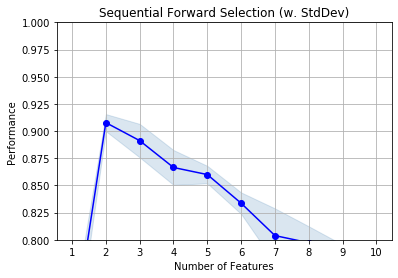

In [536]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

sfs = SFS(knn, 
          k_features=10, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=-1)

sfs = sfs.fit(X, y)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [537]:
sfs.subsets_

{1: {'feature_idx': (7,),
  'cv_scores': array([0.68627451, 0.71710526, 0.74172185, 0.68211921]),
  'avg_score': 0.7068052081411164,
  'feature_names': ('7',)},
 2: {'feature_idx': (7, 9),
  'cv_scores': array([0.90196078, 0.90789474, 0.9205298 , 0.90066225]),
  'avg_score': 0.9077618935339908,
  'feature_names': ('7', '9')},
 3: {'feature_idx': (7, 9, 19),
  'cv_scores': array([0.91503268, 0.875     , 0.89403974, 0.8807947 ]),
  'avg_score': 0.8912167792061636,
  'feature_names': ('7', '9', '19')},
 4: {'feature_idx': (3, 7, 9, 19),
  'cv_scores': array([0.88888889, 0.84868421, 0.85430464, 0.87417219]),
  'avg_score': 0.8665124801518145,
  'feature_names': ('3', '7', '9', '19')},
 5: {'feature_idx': (3, 7, 9, 19, 34),
  'cv_scores': array([0.85620915, 0.84868421, 0.86754967, 0.86754967]),
  'avg_score': 0.8599981746503644,
  'feature_names': ('3', '7', '9', '19', '34')},
 6: {'feature_idx': (3, 7, 9, 14, 19, 34),
  'cv_scores': array([0.81699346, 0.83552632, 0.8410596 , 0.8410596 ]),


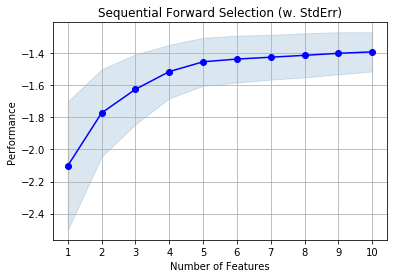

In [1015]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# boston = load_boston()
# X1 = postsecondary_component_analysis_df.iloc[:,3:].values.astype(float)
# y = postsecondary_component_analysis_df.iloc[:,68].values.astype(float)
lr = LinearRegression()

sfs = SFS(lr, 
          k_features=10, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [1016]:
postsecondary_component_analysis_df.columns.values

array(['PA School Code_x', 'School Name', 'County_x',
       'Enrollment: All Grades. Total.',
       'Enrollment: Percent From Low Income Families', 'Attendance Rate',
       'Dropout Rate (Total Dropouts/Dropout Eligible Enrollment)',
       '4 Year Cohort Graduation Rate: Total',
       '4 Year Cohort Graduation Rate: Male',
       '4 Year Cohort Graduation Rate: Female',
       'Graduates: Percent College Bound',
       'Graduates: Percent Specialized Associate Degree Granting Institution Bound',
       'Graduates: Percent Non Degree Granting Postsecondary Institution Bound',
       'CRDC: SAT/ACT Exam Participation. Male. Total.',
       'CRDC: SAT/ACT Exam Participation. Female. Total.',
       'Percent of Grade 12 Students Scoring 1550 or Higher on the SAT.',
       'Percent of Grade 12 Students Scoring 22 or Higher on the ACT',
       'Safe Schools: Academic Suspensions',
       'Safe Schools: Conduct Suspensions',
       'Safe Schools: Drug and Alcohol Suspensions',
       'Sa

In [992]:
postsecondary_significant_features_df = postsecondary_component_analysis_df[['PA School Code_x', 'School Name', 'County_x',
                                                                             'Attendance Rate',
                                                                             'Dropout Rate (Total Dropouts/Dropout Eligible Enrollment)',
                                                                             'Graduates: Percent College Bound',
                                                                             'Graduates: Percent Non Degree Granting Postsecondary Institution Bound',
                                                                             'Safe Schools: Weapons Suspensions',
                                                                             'CRDC: Number of Single-Sex Sports Offered. For Males.',
                                                                             'CRDC: Number of Single-Sex Sports Offered. For Females.',
                                                                             'Pupil/Teacher Ratio',
                                                                             'Graduates: Percent Postsecondary Bound',
                                                                             'Graduates: Postsecondary Bound Quartile']]


In [993]:
postsecondary_significant_features_df.describe()

Pupil/Teacher Ratio  Graduates: Postsecondary Bound Quartile
count           607.000000                               607.000000
mean             15.607875                                 4.497529
std              13.986305                                 2.294975
min               0.000000                                 1.000000
25%              12.575000                                 2.500000
50%              14.110000                                 4.000000
75%              15.775000                                 6.500000
max             302.000000                                 8.000000

In [994]:
# postsecondary_significant_features_df.iloc[:,3:] = postsecondary_significant_features_df.iloc[:,3:].astype(float)

In [995]:
postsecondary_significant_features_df['Attendance Rate'] = postsecondary_significant_features_df['Attendance Rate'].astype(float)
postsecondary_significant_features_df['Dropout Rate (Total Dropouts/Dropout Eligible Enrollment)'] = postsecondary_significant_features_df['Dropout Rate (Total Dropouts/Dropout Eligible Enrollment)'].astype(float)
postsecondary_significant_features_df['Graduates: Percent Postsecondary Bound'] = postsecondary_significant_features_df['Graduates: Percent Postsecondary Bound'].astype(float)

postsecondary_significant_features_df['CRDC: Number of Single-Sex Sports Offered. For Females.'] = postsecondary_significant_features_df['CRDC: Number of Single-Sex Sports Offered. For Females.'].astype(float)
postsecondary_significant_features_df['CRDC: Number of Single-Sex Sports Offered. For Males.'] = postsecondary_significant_features_df['Graduates: Percent Postsecondary Bound'].astype(float)


postsecondary_significant_features_df['Graduates: Percent Non Degree Granting Postsecondary Institution Bound'] = postsecondary_significant_features_df['Graduates: Percent Non Degree Granting Postsecondary Institution Bound'].astype(float)

postsecondary_significant_features_df['Graduates: Percent College Bound'] = postsecondary_significant_features_df['Graduates: Percent College Bound'].astype(float)







/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [996]:
# postsecondary_significant_features_df = postsecondary_significant_features_df.drop(postsecondary_significant_features_df[postsecondary_significant_features_df['Pupil/Teacher Ratio']>100.00].index)


In [998]:
plt.figure(figsize=(45, 5))
postsecondary_significant_features_df.shape

(607, 13)

<Figure size 3240x360 with 0 Axes>

In [999]:
postsecondary_significant_features_df.columns.values

array(['PA School Code_x', 'School Name', 'County_x', 'Attendance Rate',
       'Dropout Rate (Total Dropouts/Dropout Eligible Enrollment)',
       'Graduates: Percent College Bound',
       'Graduates: Percent Non Degree Granting Postsecondary Institution Bound',
       'Safe Schools: Weapons Suspensions',
       'CRDC: Number of Single-Sex Sports Offered. For Males.',
       'CRDC: Number of Single-Sex Sports Offered. For Females.',
       'Pupil/Teacher Ratio', 'Graduates: Percent Postsecondary Bound',
       'Graduates: Postsecondary Bound Quartile'], dtype=object)

In [1000]:
postsecondary_significant_features_df['Safe Schools: Weapons Suspensions'] = postsecondary_significant_features_df['Safe Schools: Weapons Suspensions'].astype(float)

/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1001]:
# postsecondary_significant_features_df['Graduates: Percent Postsecondary Bound'] 

In [1002]:
# postsecondary_significant_features_df.dtype

In [1004]:
# postsecondary_significant_features_df['Safe Schools: Academic Suspensions'] = postsecondary_significant_features_df['Safe Schools: Academic Suspensions'].astype(float)

In [1005]:
X1 = postsecondary_significant_features_df[['Graduates: Percent Postsecondary Bound', 'Pupil/Teacher Ratio']].astype(float)

In [1006]:
X1.columns.values

array(['Graduates: Percent Postsecondary Bound', 'Pupil/Teacher Ratio'],
      dtype=object)

y=-0.16 x + 25.73


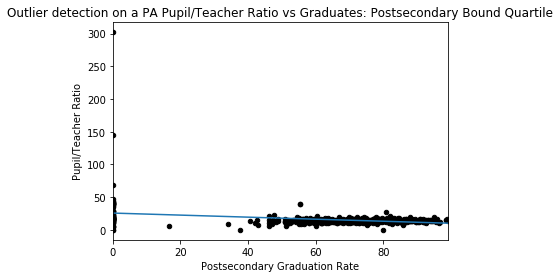

In [1007]:
z = np.polyfit(x=X1.iloc[:,0], y=X1.iloc[:,1].astype(float), deg=1)
p = np.poly1d(z)
X1['trendline'] = p(X1.iloc[:, 0])


ax = X1.plot.scatter(x='Graduates: Percent Postsecondary Bound', y='Pupil/Teacher Ratio', color='black')
X1.set_index('Graduates: Percent Postsecondary Bound', inplace=True)
X1.trendline.sort_index(ascending=False).plot(ax=ax)
# plt.gca().invert_xaxis()
plt.title("Outlier detection on a PA Pupil/Teacher Ratio vs Graduates: Postsecondary Bound Quartile")


# plt.legend((legend1_values_list[0].collections[0],
#             legend1_values_list[1].collections[0],
#             legend1_values_list[2].collections[0]),
#            (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
#            loc="upper center",
#            prop=matplotlib.font_manager.FontProperties(size=12))
plt.xlabel("Postsecondary Graduation Rate")
plt.ylabel("Pupil/Teacher Ratio")
print('y={0:.2f} x + {1:.2f}'.format(z[0],z[1]))



plt.show()

In [1008]:
X2 = postsecondary_significant_features_df[['Graduates: Percent Postsecondary Bound', 'CRDC: Number of Single-Sex Sports Offered. For Males.',]].astype(float)

y=1.00 x + 0.00


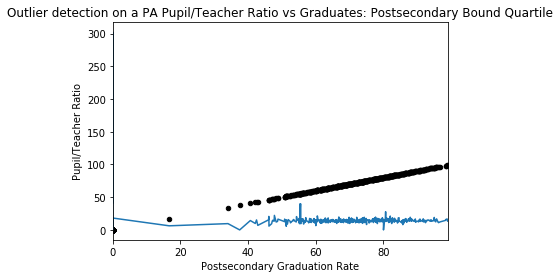

In [1009]:

z = np.polyfit(x=X2.iloc[:,0], y=X2.iloc[:,1].astype(float), deg=1)
p = np.poly1d(z)
X2['trendline'] = p(X1.iloc[:, 0])


ax = X2.plot.scatter(x='Graduates: Percent Postsecondary Bound', y='CRDC: Number of Single-Sex Sports Offered. For Males.', color='black')
X2.set_index('Graduates: Percent Postsecondary Bound', inplace=True)
X2.trendline.sort_index(ascending=False).plot(ax=ax)
# plt.gca().invert_xaxis()
plt.title("Outlier detection on a PA Pupil/Teacher Ratio vs Graduates: Postsecondary Bound Quartile")


# plt.legend((legend1_values_list[0].collections[0],
#             legend1_values_list[1].collections[0],
#             legend1_values_list[2].collections[0]),
#            (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
#            loc="upper center",
#            prop=matplotlib.font_manager.FontProperties(size=12))
plt.xlabel("Postsecondary Graduation Rate")
plt.ylabel("Pupil/Teacher Ratio")
print('y={0:.2f} x + {1:.2f}'.format(z[0],z[1]))



plt.show()

In [1010]:
X3 = postsecondary_significant_features_df[['Graduates: Percent College Bound', 'Graduates: Percent Postsecondary Bound']].astype(float)

y=1.00 x + 1.99


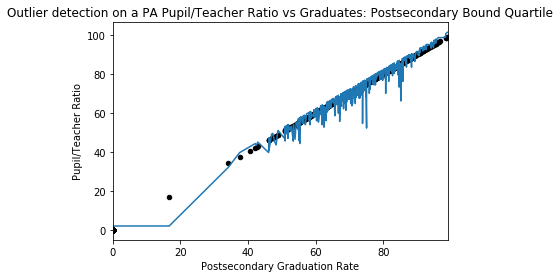

In [1011]:



z = np.polyfit(x=X3.iloc[:,0], y=X3.iloc[:,1].astype(float), deg=1)
p = np.poly1d(z)
X3['trendline'] = p(X3.iloc[:, 0])


ax = X3.plot.scatter(x='Graduates: Percent Postsecondary Bound', y='Graduates: Percent Postsecondary Bound', color='black')
X3.set_index('Graduates: Percent Postsecondary Bound', inplace=True)
X3.trendline.sort_index(ascending=False).plot(ax=ax)
# plt.gca().invert_xaxis()
plt.title("Outlier detection on a PA Pupil/Teacher Ratio vs Graduates: Postsecondary Bound Quartile")


# plt.legend((legend1_values_list[0].collections[0],
#             legend1_values_list[1].collections[0],
#             legend1_values_list[2].collections[0]),
#            (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
#            loc="upper center",
#            prop=matplotlib.font_manager.FontProperties(size=12))
plt.xlabel("Postsecondary Graduation Rate")
plt.ylabel("Pupil/Teacher Ratio")
print('y={0:.2f} x + {1:.2f}'.format(z[0],z[1]))



plt.show()

In [1012]:
X4 = postsecondary_significant_features_df[['Graduates: Percent Postsecondary Bound', 'CRDC: Number of Calculus Classes Offered']].astype(float)

KeyError: "['CRDC: Number of Calculus Classes Offered'] not in index"

In [1013]:

z = np.polyfit(x=X4.iloc[:,0], y=X4.iloc[:,1].astype(float), deg=1)
p = np.poly1d(z)
X4['trendline'] = p(X4.iloc[:, 0])


ax = X4.plot.scatter(x='Graduates: Percent Postsecondary Bound', y='CRDC: Number of Calculus Classes Offered', color='black')
X4.set_index('Graduates: Percent Postsecondary Bound', inplace=True)
X4.trendline.sort_index(ascending=False).plot(ax=ax)
# plt.gca().invert_xaxis()
plt.title("Outlier detection on a PA Pupil/Teacher Ratio vs Graduates: Postsecondary Bound Quartile")


# plt.legend((legend1_values_list[0].collections[0],
#             legend1_values_list[1].collections[0],
#             legend1_values_list[2].collections[0]),
#            (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
#            loc="upper center",
#            prop=matplotlib.font_manager.FontProperties(size=12))
plt.xlabel("Postsecondary Graduation Rate")
plt.ylabel("Pupil/Teacher Ratio")
print('y={0:.2f} x + {1:.2f}'.format(z[0],z[1]))



plt.show()

KeyError: 'Graduates: Percent Postsecondary Bound'

In [1014]:
X6 = postsecondary_significant_features_df[['Graduates: Percent Postsecondary Bound', 'CRDC: Number of Single-Sex Sports Offered. For Females.']].astype(float)

y=0.07 x + 3.10


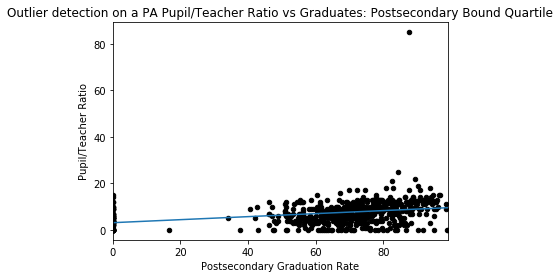

In [1015]:
z = np.polyfit(x=X6.iloc[:,0], y=X6.iloc[:,1].astype(float), deg=1)
p = np.poly1d(z)
X6['trendline'] = p(X6.iloc[:, 0])


ax = X6.plot.scatter(x='Graduates: Percent Postsecondary Bound', y='CRDC: Number of Single-Sex Sports Offered. For Females.', color='black')
X6.set_index('Graduates: Percent Postsecondary Bound', inplace=True)
X6.trendline.sort_index(ascending=False).plot(ax=ax)
# plt.gca().invert_xaxis()
plt.title("Outlier detection on a PA Pupil/Teacher Ratio vs Graduates: Postsecondary Bound Quartile")


# plt.legend((legend1_values_list[0].collections[0],
#             legend1_values_list[1].collections[0],
#             legend1_values_list[2].collections[0]),
#            (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
#            loc="upper center",
#            prop=matplotlib.font_manager.FontProperties(size=12))
plt.xlabel("Postsecondary Graduation Rate")
plt.ylabel("Pupil/Teacher Ratio")
print('y={0:.2f} x + {1:.2f}'.format(z[0],z[1]))



plt.show()

In [1016]:
X8 = postsecondary_significant_features_df[['Graduates: Percent Postsecondary Bound', 'Graduates: Percent Non Degree Granting Postsecondary Institution Bound']].astype(float)

y=0.02 x + 1.07


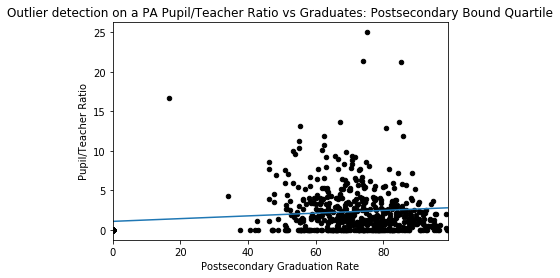

In [1017]:
z = np.polyfit(x=X8.iloc[:,0], y=X8.iloc[:,1].astype(float), deg=1)
p = np.poly1d(z)
X8['trendline'] = p(X8.iloc[:, 0])


ax = X8.plot.scatter(x='Graduates: Percent Postsecondary Bound', y='Graduates: Percent Non Degree Granting Postsecondary Institution Bound', color='black')
X8.set_index('Graduates: Percent Postsecondary Bound', inplace=True)
X8.trendline.sort_index(ascending=False).plot(ax=ax)
# plt.gca().invert_xaxis()
plt.title("Outlier detection on a PA Pupil/Teacher Ratio vs Graduates: Postsecondary Bound Quartile")


# plt.legend((legend1_values_list[0].collections[0],
#             legend1_values_list[1].collections[0],
#             legend1_values_list[2].collections[0]),
#            (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
#            loc="upper center",
#            prop=matplotlib.font_manager.FontProperties(size=12))
plt.xlabel("Postsecondary Graduation Rate")
plt.ylabel("Pupil/Teacher Ratio")
print('y={0:.2f} x + {1:.2f}'.format(z[0],z[1]))



plt.show()

In [1018]:
X9 = postsecondary_significant_features_df[['Graduates: Percent Postsecondary Bound', 'Attendance Rate']].astype(float)

y=0.14 x + 81.94


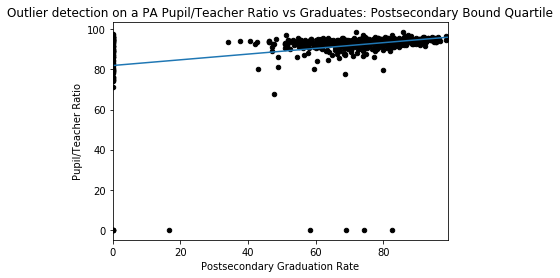

In [1019]:
z = np.polyfit(x=X9.iloc[:,0], y=X9.iloc[:,1].astype(float), deg=1)
p = np.poly1d(z)
X9['trendline'] = p(X9.iloc[:, 0])


ax = X9.plot.scatter(x='Graduates: Percent Postsecondary Bound', y='Attendance Rate', color='black')
X9.set_index('Graduates: Percent Postsecondary Bound', inplace=True)
X9.trendline.sort_index(ascending=False).plot(ax=ax)
# plt.gca().invert_xaxis()
plt.title("Outlier detection on a PA Pupil/Teacher Ratio vs Graduates: Postsecondary Bound Quartile")


# plt.legend((legend1_values_list[0].collections[0],
#             legend1_values_list[1].collections[0],
#             legend1_values_list[2].collections[0]),
#            (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
#            loc="upper center",
#            prop=matplotlib.font_manager.FontProperties(size=12))
plt.xlabel("Postsecondary Graduation Rate")
plt.ylabel("Pupil/Teacher Ratio")
print('y={0:.2f} x + {1:.2f}'.format(z[0],z[1]))



plt.show()

In [1020]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)



X, y = postsecondary_significant_features_df[['Pupil/Teacher Ratio', 'Dropout Rate (Total Dropouts/Dropout Eligible Enrollment)', 'Attendance Rate']].values.astype(float), postsecondary_significant_features_df[['Graduates: Postsecondary Bound Quartile']].values.astype(float)


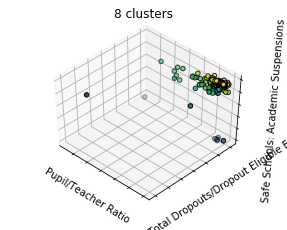

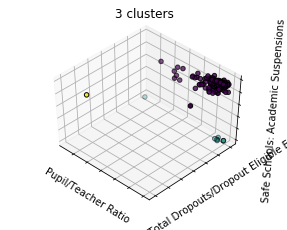

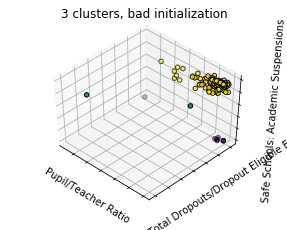

In [1021]:
estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 1], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Pupil/Teacher Ratio')
    ax.set_ylabel('Dropout Rate (Total Dropouts/Dropout Eligible Enrollment)')
    ax.set_zlabel('Safe Schools: Academic Suspensions')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1
    

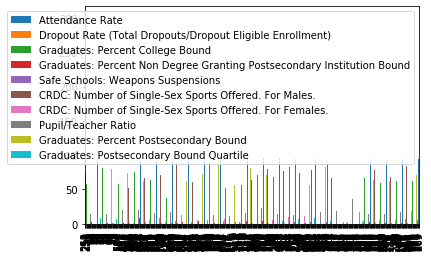

In [1022]:
postsecondary_significant_features_df.iloc[:,3:].plot.bar()

In [1024]:
postsecondary_significant_features_df.shape

(607, 13)

In [1025]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(postsecondary_significant_features_df.iloc[:,3:11].values.astype(float)))
print(z)

threshold = 3
print(np.where(z > 3))

[[0.13395354 0.41310922 0.16562558 ... 0.14979888 0.31644973 0.01272827]
 [0.19752648 0.40128967 0.10272646 ... 0.31877973 0.31644973 0.2903713 ]
 [0.17972606 0.18042382 0.64145736 ... 0.56430209 0.50476834 0.25173026]
 ...
 [0.18820245 0.51763237 0.23615919 ... 0.2432739  1.00178057 0.24385894]
 [0.30687195 0.02530022 0.24217223 ... 0.26261449 0.31644973 0.09001035]
 [0.18989773 0.33554742 0.27054782 ... 0.24937554 1.37841779 0.27033521]]
(array([  7,  13,  17,  18,  19,  24,  30,  41,  44,  55,  60,  97, 112,
       112, 112, 136, 160, 198, 219, 221, 224, 236, 238, 244, 265, 265,
       290, 320, 336, 339, 354, 358, 370, 387, 392, 411, 454, 463, 473,
       475, 475, 476, 484, 490, 491, 494, 498, 499, 541, 546, 549, 558,
       583]), array([4, 4, 0, 4, 0, 4, 0, 0, 6, 4, 0, 4, 0, 1, 3, 0, 0, 3, 4, 1, 0, 4,
       4, 1, 1, 4, 3, 1, 3, 3, 4, 4, 4, 3, 3, 1, 1, 1, 4, 1, 7, 1, 4, 1,
       7, 4, 1, 7, 3, 3, 3, 3, 6]))


In [1026]:
postsecondary_significant_features_outlier_df = postsecondary_significant_features_df[(z<3).all(axis=1)]

In [1027]:
# postsecondary_significant_features_outlier_df[postsecondary_significant_features_outlier_removed_df.index.duplicated()]

In [1028]:
# postsecondary_significant_features_outliers_df = postsecondary_significant_features_outliers_df[(z<3).all(axis=1)]
Q1 = postsecondary_significant_features_outlier_df.quantile(0.25)
Q3 = postsecondary_significant_features_outlier_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

postsecondary_significant_features_outlier_removed_df = postsecondary_significant_features_outlier_df[~((postsecondary_significant_features_outlier_df < (Q1 - 1.5 * IQR)) |(postsecondary_significant_features_outlier_df > (Q3 + 1.5 * IQR))).any(axis=1)]


Attendance Rate                                                            2.2450
Dropout Rate (Total Dropouts/Dropout Eligible Enrollment)                  1.4000
Graduates: Percent College Bound                                          21.3050
Graduates: Percent Non Degree Granting Postsecondary Institution Bound     3.1525
Safe Schools: Weapons Suspensions                                          1.0000
CRDC: Number of Single-Sex Sports Offered. For Males.                     19.5500
CRDC: Number of Single-Sex Sports Offered. For Females.                    6.0000
Pupil/Teacher Ratio                                                        3.1150
Graduates: Percent Postsecondary Bound                                    19.5500
Graduates: Postsecondary Bound Quartile                                    4.0000
dtype: float64


In [1029]:
postsecondary_significant_features_outlier_removed_df[postsecondary_significant_features_outlier_removed_df.index.duplicated()]

Empty DataFrame
Columns: [PA School Code_x, School Name, County_x, Attendance Rate, Dropout Rate (Total Dropouts/Dropout Eligible Enrollment), Graduates: Percent College Bound, Graduates: Percent Non Degree Granting Postsecondary Institution Bound, Safe Schools: Weapons Suspensions, CRDC: Number of Single-Sex Sports Offered. For Males., CRDC: Number of Single-Sex Sports Offered. For Females., Pupil/Teacher Ratio, Graduates: Percent Postsecondary Bound, Graduates: Postsecondary Bound Quartile]
Index: []

In [1030]:
postsecondary_significant_features_outliers_removed_df = postsecondary_significant_features_outliers_removed_df[~postsecondary_significant_features_outliers_removed_df.index.duplicated()]

In [1031]:
postsecondary_significant_features_outliers_removed_df.shape

(377, 15)

In [1032]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

print(X)

X = postsecondary_significant_features_outliers_removed_df.iloc[:,3:12].values.astype(float)
y = postsecondary_significant_features_outliers_removed_df.iloc[:,14].values.astype(float)
print(X)

mean_vectors = []
for cl in range(1,9):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))
    

[[15.43  0.6  92.76]
 [11.55  2.7  93.51]
 [12.09  1.2  93.3 ]
 ...
 [12.2   3.   93.4 ]
 [14.35  1.6  94.8 ]
 [11.83  0.8  93.42]]
[[92.76  0.6  58.6  ...  1.   61.15  9.  ]
 [93.51  2.7  65.22 ...  3.   72.83  9.  ]
 [93.3   1.2  78.51 ... 10.   78.95 10.  ]
 ...
 [93.4   3.   56.86 ...  1.   58.82  2.  ]
 [94.8   1.6  68.66 ...  3.   71.43  9.  ]
 [93.42  0.8  69.36 ...  1.   71.1   0.  ]]
Mean Vector class 1: [92.47571429  1.68571429 42.32        1.15857143  0.          0.42857143
  1.71428571 43.47571429  6.        ]

Mean Vector class 2: [93.34816327  1.33877551 52.75163265  2.33836735  0.          0.53061224
  1.81632653 55.08857143  5.89795918]

Mean Vector class 3: [93.20884615  1.30769231 60.77115385  2.24865385  0.          0.32692308
  1.86538462 63.01961538  5.80769231]

Mean Vector class 4: [93.21907407  1.20925926 66.16074074  2.23444444  0.          0.35185185
  2.7037037  68.39518519  6.25925926]

Mean Vector class 5: [93.57711111  1.29111111 70.57066667  2.45066667  0

In [1035]:
S_W = np.zeros((9,9))
for cl,mv in zip(range(1,9), mean_vectors):
    class_sc_mat = np.zeros((9,9))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(9,1), mv.reshape(9,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

# S_W = S_W.replace('NaN', 0)

# S_W = S_W.replace('inf', 0)

overall_mean = np.mean(X, axis=0)

S_B = np.zeros((9,9))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(9,1) # make column vector
    overall_mean = overall_mean.reshape(9,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

within-class Scatter Matrix:
 [[ 7.34162579e+02 -1.34178202e+02  1.33134028e+02 -2.61420774e+01
   0.00000000e+00 -2.41383087e+01  5.00390359e+01  1.06832774e+02
   6.31947057e+01]
 [-1.34178202e+02  2.06102873e+02 -8.08890402e+01  3.78461469e+01
   0.00000000e+00  1.06421487e+01  2.29217594e+01 -4.31328221e+01
   5.68000877e+01]
 [ 1.33134028e+02 -8.08890402e+01  3.75498074e+03 -1.65400681e+03
   0.00000000e+00 -1.33606716e+01  3.12021775e+02  2.10110242e+03
   3.39687720e+02]
 [-2.61420774e+01  3.78461469e+01 -1.65400681e+03  1.40534291e+03
   0.00000000e+00  1.46860630e+00 -2.07139993e+02 -2.49031490e+02
  -3.73077983e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-2.41383087e+01  1.06421487e+01 -1.33606716e+01  1.46860630e+00
   0.00000000e+00  1.86436661e+02  5.44882378e+01 -1.19370211e+01
   1.69694414e+02]
 [ 5.00390359e+01  2.29217594e+01  3.12021775e+02 -2.07139993e+0

In [1036]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_B).dot(S_W))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(9,1)  

LinAlgError: Singular matrix

In [1037]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

17.802074226668825
1.0093742303811382
0.3159942605956472
0.057559278473802426
0.016957733882139246
0.013286012396023955
0.002577050137554723
7.947684433822074e-07
1.3468979345996381e-11


In [1038]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 92.63%
eigenvalue 2: 5.25%
eigenvalue 3: 1.64%
eigenvalue 4: 0.30%
eigenvalue 5: 0.09%
eigenvalue 6: 0.07%
eigenvalue 7: 0.01%
eigenvalue 8: 0.00%
eigenvalue 9: 0.00%


In [1039]:
W_1 = np.hstack((eig_pairs[0][1].reshape(9,1), eig_pairs[1][1].reshape(9,1)))
print('Matrix W:\n', W_1.real)

Matrix W:
 [[ 1.37515660e-04 -2.91808544e-04]
 [ 2.34174867e-04  5.79566067e-04]
 [ 5.76272556e-01  5.78048516e-01]
 [ 5.76985398e-01  5.75286993e-01]
 [-2.79476558e-04 -4.08003533e-04]
 [ 3.81928850e-04 -1.94649067e-03]
 [-3.70382473e-03  1.03971642e-02]
 [-5.78777829e-01 -5.78611837e-01]
 [-1.13442675e-05  8.09208223e-04]]


In [1040]:
from statistics import mean, median


X_lda = X.dot(W_1)
# assert X_lda.shape == (62,2), "The matrix is not 150x2 dimensional."

KeyError: 9

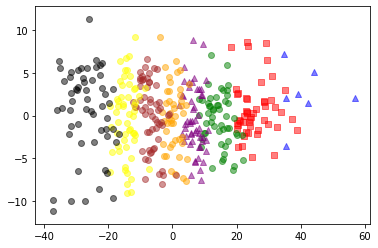

In [1042]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
X_pca = sklearn_pca.fit_transform(X)


ax = plt.subplot(111)

for label,marker,color in zip(
    range(1,10),('^', 's', 'o', '^', 'o', 'o', 'o', 'o', 'o'),('blue', 'red', 'green', 'purple', 'orange', 'brown', 'yellow', 'black', 'grey')):

    plt.scatter(x=X_pca[:,0][y == label],
            y=X_pca[:,1][y == label],
            marker=marker,
            color=color,
            alpha=0.5,
            label=label_dict[label]
            )

plt.xlabel('PC1')
plt.ylabel('PC2')


leg = plt.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.5)
plt.title('PCA: Highschool Graduation Post Secondary Rate  projection onto the first 2 principal components')

# hide axis ticks
plt.tick_params(axis="both", which="both", bottom="off", top="off",  
        labelbottom="on", left="off", right="off", labelleft="on")
# remove axis spines
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)    

plt.tight_layout
plt.grid()

plt.show()

In [1054]:
postsecondary_significant_features_outlier_removed_df.shape

(419, 13)

In [ ]:
postsecondary_significant_features_outliers_removed_df.columns.values

In [ ]:
postsecondary_significant_features_outliers_removed_df.iloc[:,13:14]

In [ ]:

iris.data[:, :2].dtype

In [ ]:
postsecondary_significant_features_outliers_removed_df.iloc[:,4:6].values.astype(float).dtype

In [ ]:
# print(X)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# import some data to play with
iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features.
# y = np.array(iris.target, dtype=int)

X = postsecondary_significant_features_outliers_removed_df.iloc[:,4:6].values.astype(float)
y = np.array(postsecondary_significant_features_outliers_removed_df.iloc[:,14].values, dtype=int )



h = .1  # step size in the mesh


kernel = 1.0 * RBF([1.0])
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)
kernel = 1.0 * RBF([1.0, 1.0])
gpc_rbf_anisotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)

In [ ]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ["Isotropic RBF", "Anisotropic RBF"]
plt.figure(figsize=(10, 5))
for i, clf in enumerate((gpc_rbf_isotropic, gpc_rbf_anisotropic)):
    # Plot the predicted probabilities. For that, we will assign a color to
    # each point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(1, 2, i + 1)
    print("1",Z.shape)
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    print("2",Z.shape)

    # Put the result into a color plot
    Z = Z.reshape((xx.shape[0], xx.shape[1], 8))
#     plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=np.array(["r", "g", "b", "y", "pink", "r", "black", "orange"])[y-1],
                edgecolors=(0, 0, 0))
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title("%s, LML: %.3f" %
              (titles[i], clf.log_marginal_likelihood(clf.kernel_.theta)))

plt.tight_layout()
plt.show()

In [1097]:
postsecondary_significant_features_outlier_removed_df.head()

PA School Code_x           School Name County_x  Attendance Rate  \
250             0003  BERMUDIAN SPRINGS HS    Adams            92.76   
252             6269     FAIRFIELD AREA HS    Adams            93.51   
253             6271    GETTYSBURG AREA HS    Adams            93.30   
254             0014       LITTLESTOWN SHS    Adams            93.68   
255             0021        BIGLERVILLE HS    Adams            94.19   

     Dropout Rate (Total Dropouts/Dropout Eligible Enrollment)  \
250                                                0.6           
252                                                2.7           
253                                                1.2           
254                                                1.8           
255                                                1.7           

     Graduates: Percent College Bound  \
250                             58.60   
252                             65.22   
253                             78.51   
254                             57.14   
255                             73.95   

     Graduates: Percent Non Degree Granting Postsecondary Institution Bound  \
250                                               2.55                        
252                                               7.61                        
253                                               0.44                        
254                                               5.26                        
255                                               0.84                        

     Safe Schools: Weapons Suspensions  \
250                                0.0   
252                                0.0   
253                                2.0   
254                                0.0   
255                                0.0   

     CRDC: Number of Single-Sex Sports Offered. For Males.  \
250                                              61.15       
252                                              72.83       
253                                              78.95       
254                                              62.41       
255                                              74.79       

     CRDC: Number of Single-Sex Sports Offered. For Females.  \
250                                                9.0         
252                                                9.0         
253                                               10.0         
254                                                8.0         
255                                                8.0         

     Pupil/Teacher Ratio  Graduates: Percent Postsecondary Bound  \
250                15.43                                   61.15   
252                11.55                                   72.83   
253                12.09                                   78.95   
254                11.78                                   62.41   
255                14.14                                   74.79   

     Graduates: Postsecondary Bound Quartile  
250                                        3  
252                                        5  
253                                        6  
254                                        3  
255                                        5

/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


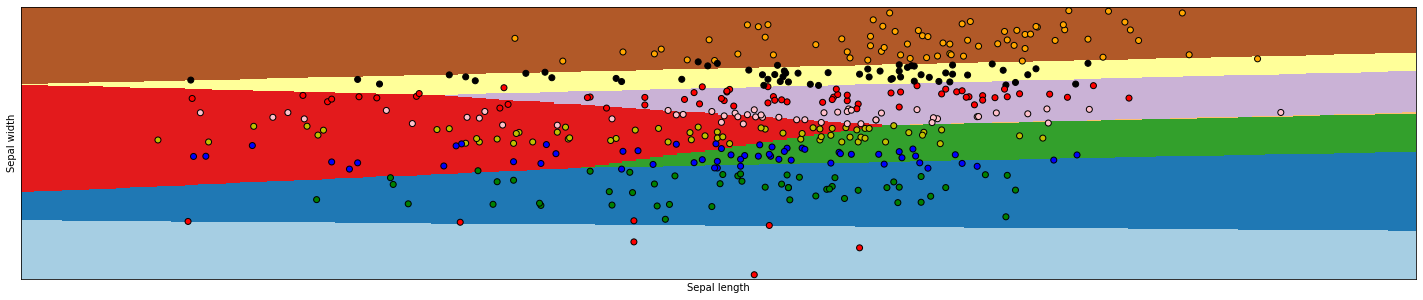

In [1124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features.
# Y = iris.target

X = postsecondary_significant_features_outlier_removed_df[["Attendance Rate", "CRDC: Number of Single-Sex Sports Offered. For Males."]].values.astype(float)
y = np.array(postsecondary_significant_features_outlier_removed_df.iloc[:,12].values, dtype=int )

h = .1  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])



# Put the result into a color plot
Z = Z.reshape(xx.shape)



plt.figure(1, figsize=(25, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=np.array(["r", "g", "b", "y", "pink", "r", "black", "orange"])[y-1], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [1073]:
# postsecondary_significant_features_outlier_removed_df.iloc[:,9:11]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 8
plot_colors = "red", "green", "blue", "yellow", "pink", "brown", "black", "orange"
plot_step = 0.1

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3,9], [3,10], [3, 11]]):
    # We only take the two corresponding features
#     X = iris.data[:, pair]
#     y = iris.target

    X = postsecondary_significant_features_outlier_removed_df.iloc[:,pair].values.astype(float)
    y = postsecondary_significant_features_outlier_removed_df.iloc[:,12].values.astype(float)


    # Train
    clf = DecisionTreeClassifier().fit(X, y)
    plt.figure(figsize=(25, 5))

    # Plot the decision boundary
    plt.subplot(2, 4, pairidx + 1)
    print("pairidx", pairidx)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

#     plt.xlabel(iris.feature_names[pair[0]])
#     plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.legend(loc='lower right', borderpad=0, handletextpad=0)
#         plt.figure(figsize=(25, 5))

        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=y[i-1],
                    cmap=plt.cm.Paired, edgecolor='black', s=20)
        
# plt.suptitle("Decision surface of a decision tree using paired features")
# plt.figure(1, figsize=(25, 5))
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

In [1058]:
import numpy as np
import matplotlib.pyplot as plt

# from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 8
plot_colors = "red", "green", "blue", "yellow", "pink", "brown", "black", "orange"
plot_step = 0.1

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[4, 3], [4, 5], [4, 6], [4, 7], [4, 8], [4,9], [4,10], [4, 11]]):
    # We only take the two corresponding features
#     X = iris.data[:, pair]
#     y = iris.target

    X = postsecondary_significant_features_outlier_removed_df.iloc[:,pair].values.astype(float)
    y = postsecondary_significant_features_outlier_removed_df.iloc[:,12].values.astype(float)

    # Train
    clf = DecisionTreeClassifier().fit(X, y)
    plt.figure(figsize=(25, 5))

    # Plot the decision boundary
    plt.subplot(2, 4, pairidx + 1)
    print("pairidx", pairidx)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

#     plt.xlabel(iris.feature_names[pair[0]])
#     plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.legend(loc='lower right', borderpad=0, handletextpad=0)
#         plt.figure(figsize=(25, 5))

        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=y[i],
                    cmap=plt.cm.Paired, edgecolor='black', s=15)
        
# plt.suptitle("Decision surface of a decision tree using paired features")
# plt.figure(1, figsize=(25, 5))
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

ValueError: Unknown label type: 'continuous'

/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: The following kwargs were not used by contour: 'c'
No handles with labels found to put in legend.
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: The following kwargs were not used by contour: 'c'
No handles with labels found to put in legend.


pairidx 0
pairidx 1


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: The following kwargs were not used by contour: 'c'
No handles with labels found to put in legend.
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: The following kwargs were not used by contour: 'c'
No handles with labels found to put in legend.


pairidx 2
pairidx 3
pairidx 4


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: The following kwargs were not used by contour: 'c'
No handles with labels found to put in legend.
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: The following kwargs were not used by contour: 'c'
No handles with labels found to put in legend.
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: The following kwargs were not used by contour: 'c'
No handles with labels found to put in legend.


pairidx 5
pairidx 6


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: The following kwargs were not used by contour: 'c'
No handles with labels found to put in legend.


pairidx 7


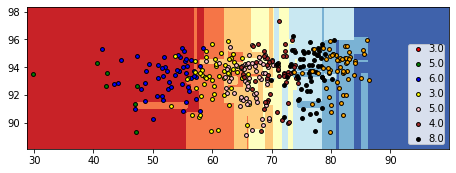

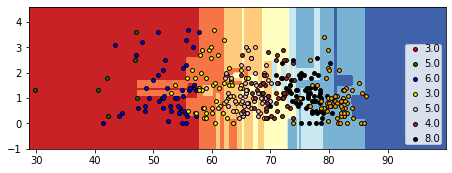

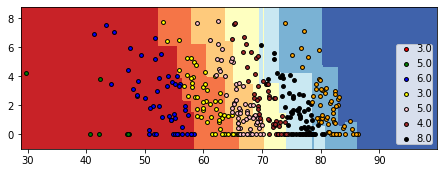

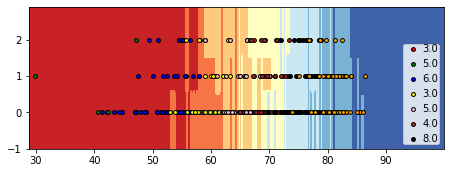

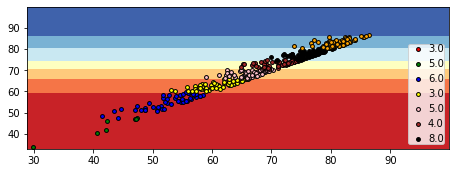

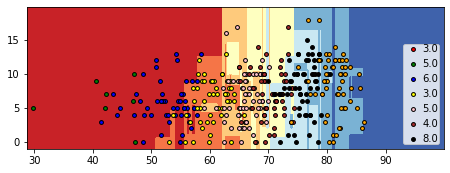

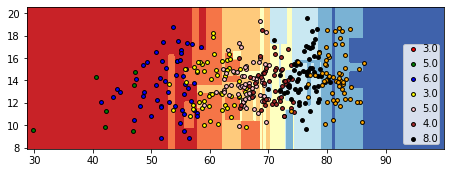

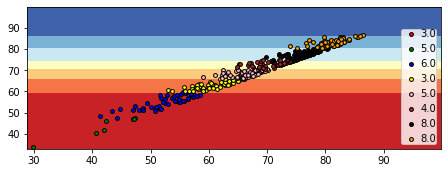

In [1112]:
import numpy as np
import matplotlib.pyplot as plt

# from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 8
plot_colors = "red", "green", "blue", "yellow", "pink", "brown", "black", "orange"
plot_step = 0.1

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[5, 3], [5, 4], [5, 6], [5, 7], [5, 8], [5,9], [5,10], [5, 11]]):
    # We only take the two corresponding features
#     X = iris.data[:, pair]
#     y = iris.target

    X = postsecondary_significant_features_outlier_removed_df.iloc[:,pair].values.astype(float)
    y = postsecondary_significant_features_outlier_removed_df.iloc[:,12].values.astype(float)

    # Train
    clf = DecisionTreeClassifier().fit(X, y)
    plt.figure(figsize=(25, 5))

    # Plot the decision boundary
    plt.subplot(2, 4, pairidx + 1)
    print("pairidx", pairidx)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z,c=Y, cmap=plt.cm.RdYlBu)
#     plt.xlabel(iris.feature_names[pair[0]])
#     plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.legend(loc='lower right', borderpad=0, handletextpad=0)
#         plt.figure(figsize=(25, 5))

        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=y[i],
                    cmap=plt.cm.Paired, edgecolor='black', s=15)
        
# plt.suptitle("Decision surface of a decision tree using paired features")
# plt.figure(1, figsize=(25, 5))
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: The following kwargs were not used by contour: 'c'
No handles with labels found to put in legend.
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: The following kwargs were not used by contour: 'c'
No handles with labels found to put in legend.


pairidx 0
pairidx 1


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: The following kwargs were not used by contour: 'c'
No handles with labels found to put in legend.


pairidx 2
pairidx 3


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: The following kwargs were not used by contour: 'c'
No handles with labels found to put in legend.
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: The following kwargs were not used by contour: 'c'
No handles with labels found to put in legend.
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: The following kwargs were not used by contour: 'c'
No handles with labels found to put in legend.


pairidx 4
pairidx 5


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: The following kwargs were not used by contour: 'c'
No handles with labels found to put in legend.


pairidx 6
pairidx 7


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: The following kwargs were not used by contour: 'c'
No handles with labels found to put in legend.


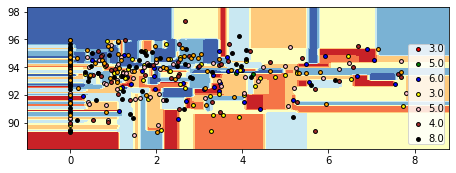

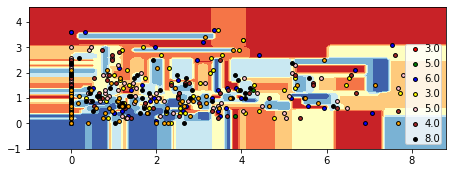

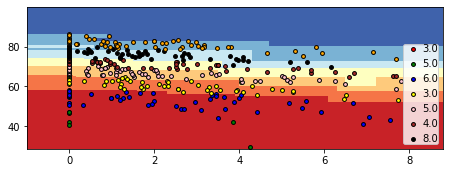

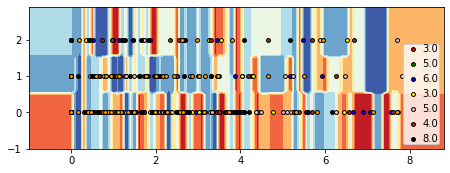

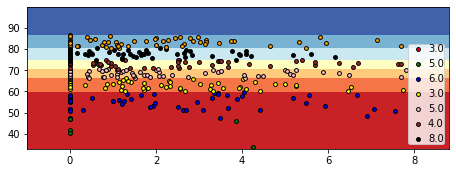

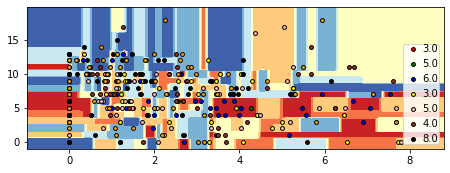

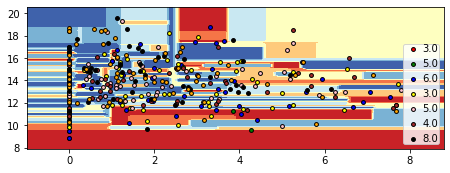

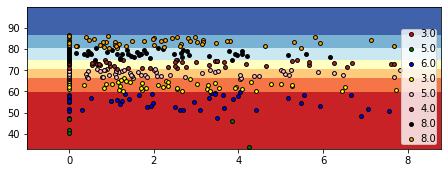

In [1113]:
import numpy as np
import matplotlib.pyplot as plt

# from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 8
plot_colors = "red", "green", "blue", "yellow", "pink", "brown", "black", "orange"
plot_step = 0.1

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[6, 3], [6, 4], [6, 5], [6, 7], [6, 8], [6,9], [6,10], [6, 11]]):
    # We only take the two corresponding features
#     X = iris.data[:, pair]
#     y = iris.target

    X = postsecondary_significant_features_outlier_removed_df.iloc[:,pair].values.astype(float)
    y = postsecondary_significant_features_outlier_removed_df.iloc[:,12].values.astype(float)

    # Train
    clf = DecisionTreeClassifier().fit(X, y)
    plt.figure(figsize=(25, 5))

    # Plot the decision boundary
    plt.subplot(2, 4, pairidx + 1)
    print("pairidx", pairidx)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, c=Y, cmap=plt.cm.RdYlBu)

#     plt.xlabel(iris.feature_names[pair[0]])
#     plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.legend(loc='lower right', borderpad=0, handletextpad=0)
#         plt.figure(figsize=(25, 5))

        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=y[i],
                    cmap=plt.cm.Paired, edgecolor='black', s=15)
# plt.suptitle("Decision surface of a decision tree using paired features")
# plt.figure(1, figsize=(25, 5))
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: The following kwargs were not used by contour: 'c'
No handles with labels found to put in legend.
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: The following kwargs were not used by contour: 'c'
No handles with labels found to put in legend.


pairidx 0
pairidx 1


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: The following kwargs were not used by contour: 'c'
No handles with labels found to put in legend.
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: The following kwargs were not used by contour: 'c'
No handles with labels found to put in legend.


pairidx 2
pairidx 3


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: The following kwargs were not used by contour: 'c'
No handles with labels found to put in legend.
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: The following kwargs were not used by contour: 'c'
No handles with labels found to put in legend.


pairidx 4
pairidx 5
pairidx 6


/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: The following kwargs were not used by contour: 'c'
No handles with labels found to put in legend.
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: The following kwargs were not used by contour: 'c'
No handles with labels found to put in legend.


pairidx 7


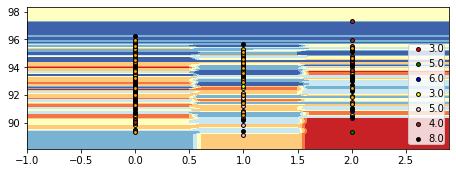

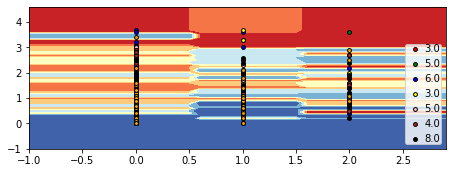

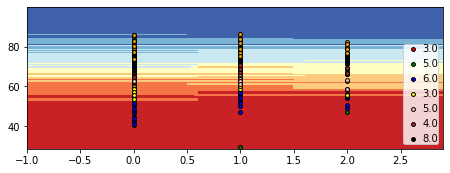

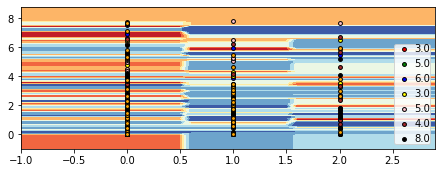

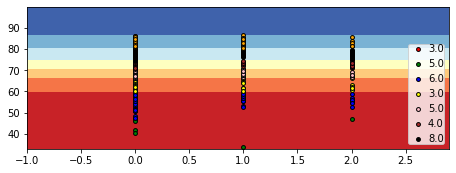

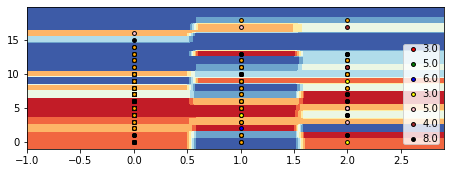

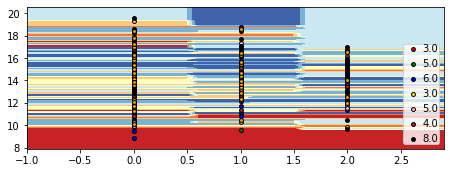

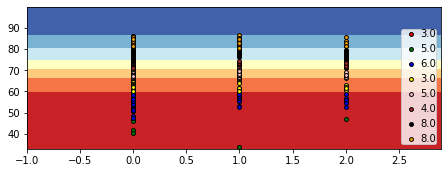

In [1114]:
import numpy as np
import matplotlib.pyplot as plt

# from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 8
plot_colors = "red", "green", "blue", "yellow", "pink", "brown", "black", "orange"
plot_step = 0.1

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[7, 3], [7, 4], [7, 5], [7, 6], [7, 8], [7,9], [7,10], [7, 11]]):
    # We only take the two corresponding features
#     X = iris.data[:, pair]
#     y = iris.target

    X = postsecondary_significant_features_outlier_removed_df.iloc[:,pair].values.astype(float)
    y = postsecondary_significant_features_outlier_removed_df.iloc[:,12].values.astype(float)

    # Train
    clf = DecisionTreeClassifier().fit(X, y)
    plt.figure(figsize=(25, 5))

    # Plot the decision boundary
    plt.subplot(2, 4, pairidx + 1)
    print("pairidx", pairidx)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z,c=Y, cmap=plt.cm.RdYlBu)

#     plt.xlabel(iris.feature_names[pair[0]])
#     plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.legend(loc='lower right', borderpad=0, handletextpad=0)
#         plt.figure(figsize=(25, 5))

        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=y[i],
                    cmap=plt.cm.Paired, edgecolor='black', s=15)
# plt.suptitle("Decision surface of a decision tree using paired features")
# plt.figure(1, figsize=(25, 5))
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


pairidx 0
pairidx 1
pairidx 2


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


pairidx 3
pairidx 4
pairidx 5


No handles with labels found to put in legend.
No handles with labels found to put in legend.


pairidx 6
pairidx 7


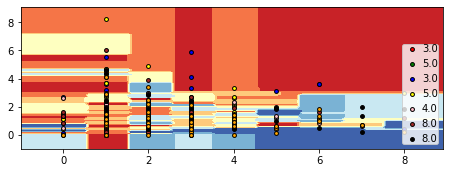

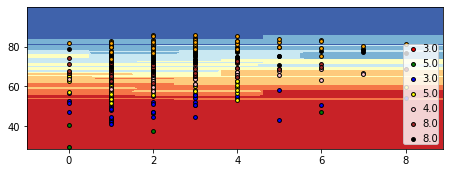

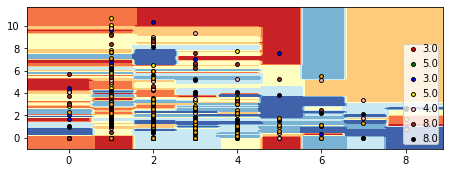

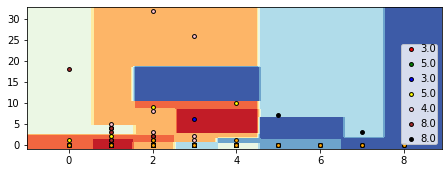

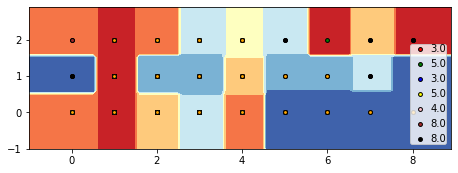

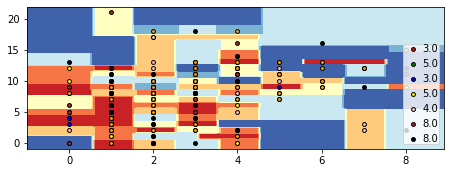

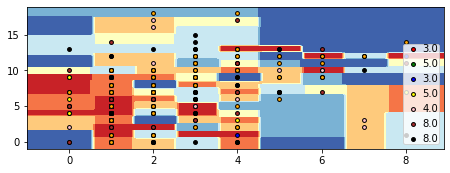

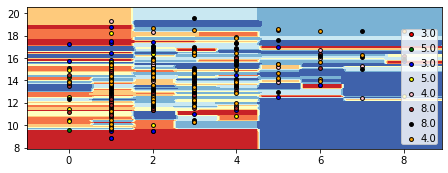

In [407]:
import numpy as np
import matplotlib.pyplot as plt

# from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 8
plot_colors = "red", "green", "blue", "yellow", "pink", "brown", "black", "orange"
plot_step = 0.1

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[8, 3], [8, 4], [8, 5], [8, 6], [8, 7], [8,9], [8,10], [8, 11]]):
    # We only take the two corresponding features
#     X = iris.data[:, pair]
#     y = iris.target

    X = postsecondary_significant_features_outlier_removed_df.iloc[:,pair].values.astype(float)
    y = postsecondary_significant_features_outlier_removed_df.iloc[:,12].values.astype(float)

    # Train
    clf = DecisionTreeClassifier().fit(X, y)
    plt.figure(figsize=(25, 5))

    # Plot the decision boundary
    plt.subplot(2, 4, pairidx + 1)
    print("pairidx", pairidx)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

#     plt.xlabel(iris.feature_names[pair[0]])
#     plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.legend(loc='lower right', borderpad=0, handletextpad=0)
#         plt.figure(figsize=(25, 5))

        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=y[i],
                    cmap=plt.cm.Paired, edgecolor='black', s=15)
# plt.suptitle("Decision surface of a decision tree using paired features")
# plt.figure(1, figsize=(25, 5))
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


pairidx 0
pairidx 1
pairidx 2


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


pairidx 3
pairidx 4
pairidx 5


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


pairidx 6
pairidx 7


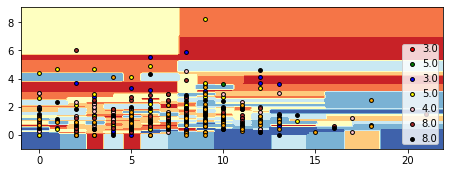

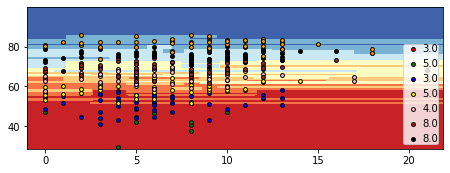

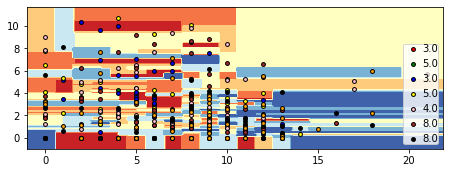

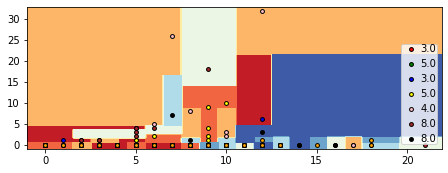

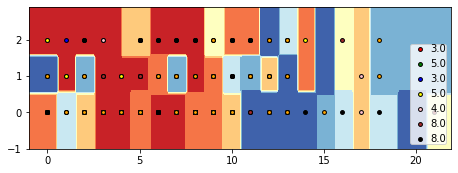

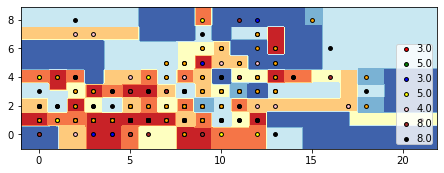

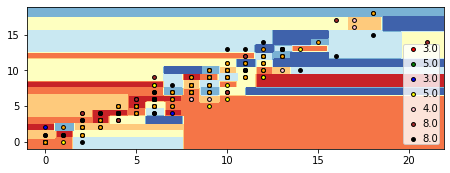

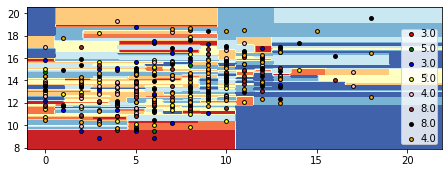

In [408]:
import numpy as np
import matplotlib.pyplot as plt

# from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 8
plot_colors = "red", "green", "blue", "yellow", "pink", "brown", "black", "orange"
plot_step = 0.1

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[9, 3], [9, 4], [9, 5], [9, 6], [9, 7], [9,8], [9,10], [9, 11]]):
    # We only take the two corresponding features
#     X = iris.data[:, pair]
#     y = iris.target

    X = postsecondary_significant_features_outlier_removed_df.iloc[:,pair].values.astype(float)
    y = postsecondary_significant_features_outlier_removed_df.iloc[:,12].values.astype(float)

    # Train
    clf = DecisionTreeClassifier().fit(X, y)
    plt.figure(figsize=(25, 5))

    # Plot the decision boundary
    plt.subplot(2, 4, pairidx + 1)
    print("pairidx", pairidx)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

#     plt.xlabel(iris.feature_names[pair[0]])
#     plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.legend(loc='lower right', borderpad=0, handletextpad=0)
#         plt.figure(figsize=(25, 5))

        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=y[i],
                    cmap=plt.cm.Paired, edgecolor='black', s=15)
# plt.suptitle("Decision surface of a decision tree using paired features")
# plt.figure(1, figsize=(25, 5))
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


pairidx 0
pairidx 1
pairidx 2


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


pairidx 3
pairidx 4
pairidx 5


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


pairidx 6
pairidx 7


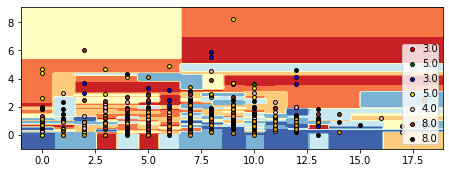

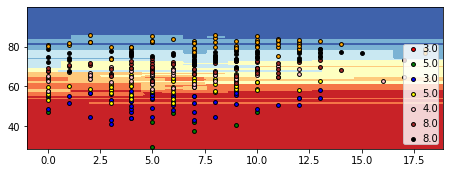

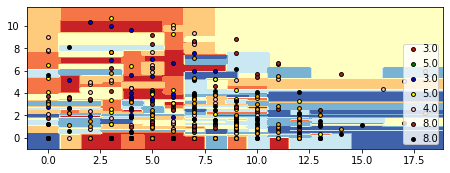

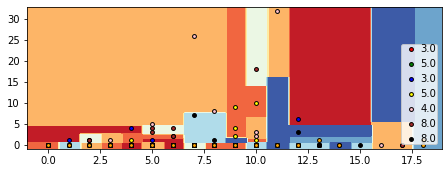

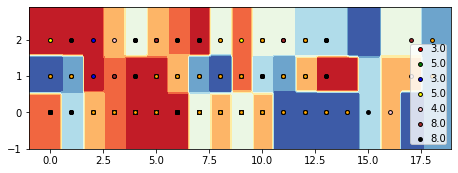

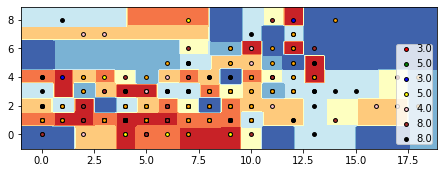

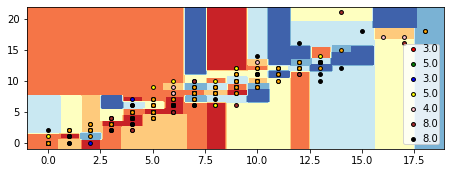

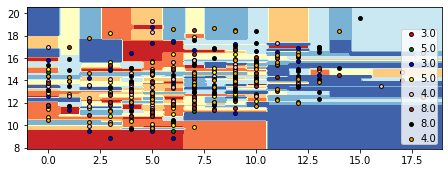

In [409]:
import numpy as np
import matplotlib.pyplot as plt

# from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 8
plot_colors = "red", "green", "blue", "yellow", "pink", "brown", "black", "orange"
plot_step = 0.1

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[10, 3], [10, 4], [10, 5], [10, 6], [10, 7], [10,8], [10,9], [10, 11]]):
    # We only take the two corresponding features
#     X = iris.data[:, pair]
#     y = iris.target

    X = postsecondary_significant_features_outlier_removed_df.iloc[:,pair].values.astype(float)
    y = postsecondary_significant_features_outlier_removed_df.iloc[:,12].values.astype(float)

    # Train
    clf = DecisionTreeClassifier().fit(X, y)
    plt.figure(figsize=(25, 5))

    # Plot the decision boundary
    plt.subplot(2, 4, pairidx + 1)
    print("pairidx", pairidx)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

#     plt.xlabel(iris.feature_names[pair[0]])
#     plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.legend(loc='lower right', borderpad=0, handletextpad=0)
#         plt.figure(figsize=(25, 5))

        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=y[i],
                    cmap=plt.cm.Paired, edgecolor='black', s=15)
# plt.suptitle("Decision surface of a decision tree using paired features")
# plt.figure(1, figsize=(25, 5))
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


pairidx 0
pairidx 1
pairidx 2


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


pairidx 3
pairidx 4
pairidx 5


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


pairidx 6
pairidx 7


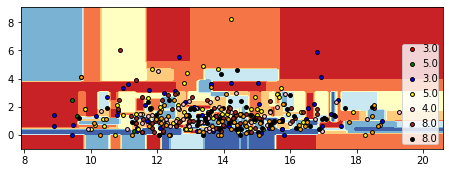

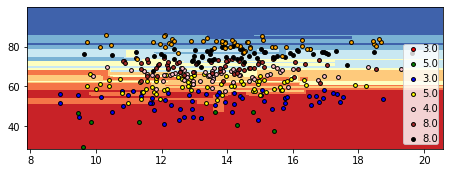

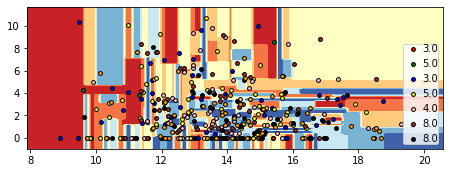

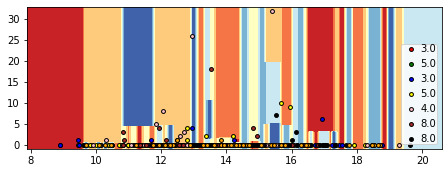

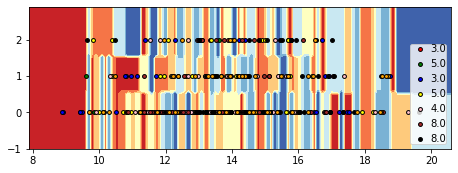

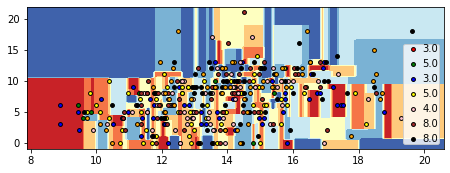

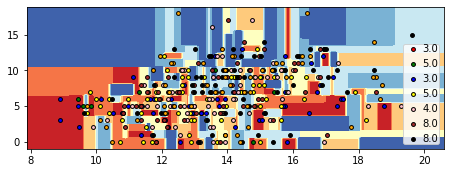

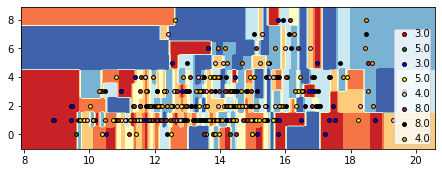

In [410]:
import numpy as np
import matplotlib.pyplot as plt

# from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 8
plot_colors = "red", "green", "blue", "yellow", "pink", "brown", "black", "orange"
plot_step = 0.1

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[11, 3], [11, 4], [11, 5], [11, 6], [11, 7], [11,9], [11,10], [11, 8]]):
    # We only take the two corresponding features
#     X = iris.data[:, pair]
#     y = iris.target

    X = postsecondary_significant_features_outlier_removed_df.iloc[:,pair].values.astype(float)
    y = postsecondary_significant_features_outlier_removed_df.iloc[:,12].values.astype(float)

    # Train
    clf = DecisionTreeClassifier().fit(X, y)
    plt.figure(figsize=(25, 5))

    # Plot the decision boundary
    plt.subplot(2, 4, pairidx + 1)
    print("pairidx", pairidx)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

#     plt.xlabel(iris.feature_names[pair[0]])
#     plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.legend(loc='lower right', borderpad=0, handletextpad=0)
#         plt.figure(figsize=(25, 5))

        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=y[i],
                    cmap=plt.cm.Paired, edgecolor='black', s=15)
# plt.suptitle("Decision surface of a decision tree using paired features")
# plt.figure(1, figsize=(25, 5))
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: The following kwargs were not used by contour: 'c'
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: The following kwargs were not used by contour: 'c'
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: The following kwargs were not used by contour: 'c'
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarn

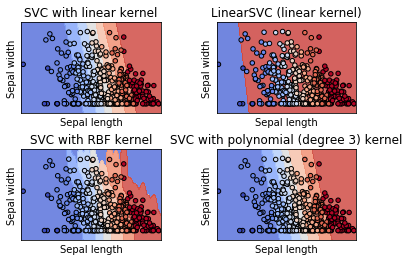

In [1118]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, c=y, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
# X = iris.data[:, :2]
# y = iris.target
X = postsecondary_significant_features_outlier_removed_df.iloc[:,5:7].values.astype(float)
y = postsecondary_significant_features_outlier_removed_df.iloc[:,12].values.astype(float)

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/semi_supervised/label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/semi_supervised/label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


KeyboardInterrupt: 

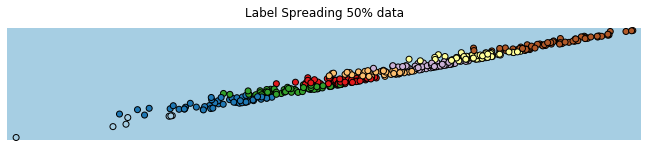

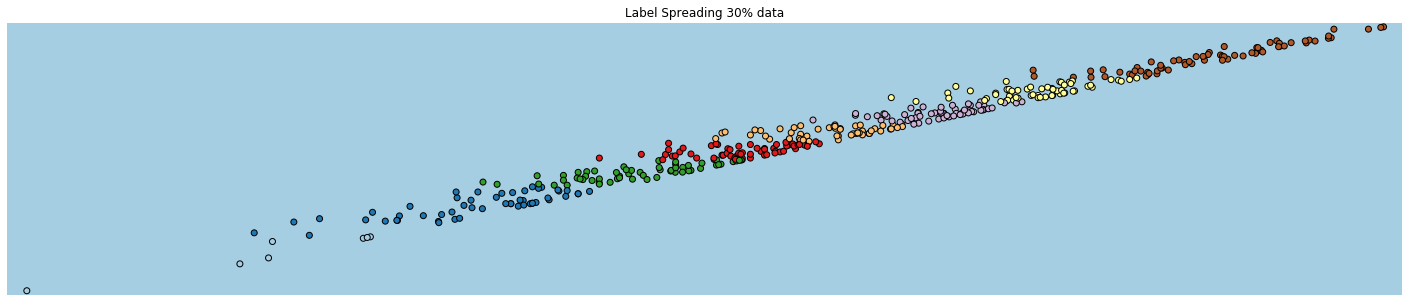

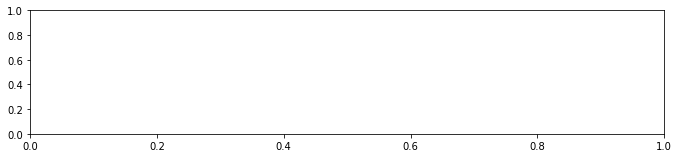

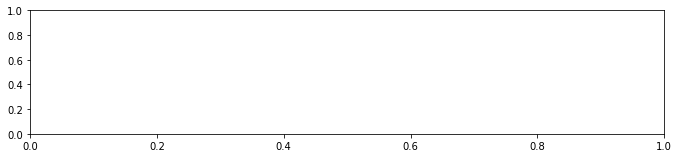

In [1136]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.semi_supervised import label_propagation

rng = np.random.RandomState(0)

iris = datasets.load_iris()

X = postsecondary_significant_features_outlier_removed_df[["Graduates: Percent College Bound", "CRDC: Number of Single-Sex Sports Offered. For Males."]].values.astype(float)
Y = postsecondary_significant_features_outlier_removed_df.iloc[:,12].values.astype(float)
# step size in the mesh
h = .05

y_30 = np.copy(Y)
y_30[rng.rand(len(Y)) < 0.3] = -1
y_50 = np.copy(y)
y_50[rng.rand(len(Y)) < 0.5] = -1
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
ls30 = (label_propagation.LabelSpreading().fit(X, y_30),
        y_30)
ls50 = (label_propagation.LabelSpreading().fit(X, y_50),
        y_50)
ls100 = (label_propagation.LabelSpreading().fit(X, y), y)
rbf_svc = (svm.SVC(kernel='rbf').fit(X, y), y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['Label Spreading 30% data',
          'Label Spreading 50% data',
          'Label Spreading 100% data',
          'SVC with rbf kernel']
color_map = {0: (1, 1, 1), 1: (2, 2, 2), 2: (3, 3, 3), 3: (4, .6, 0), 4: (.3, .6, 0), 5: (.4, .6, 0),
            6: (.2, .6, 0), 7: (.1, .6, 0), 8: (.0, .7, 0)}

for i, (clf, y_train) in enumerate((ls30, ls50, ls100, rbf_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.figure(figsize=(25, 5))

    plt.subplot(2, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(i, figsize=(25, 5))

    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis('off')

    # Plot also the training points
#     colors = [color_map[y] for y in y_train]
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

    plt.title(titles[i])

plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()

In [1129]:
postsecondary_significant_features_outlier_removed_df.columns.values

array(['PA School Code_x', 'School Name', 'County_x', 'Attendance Rate',
       'Dropout Rate (Total Dropouts/Dropout Eligible Enrollment)',
       'Graduates: Percent College Bound',
       'Graduates: Percent Non Degree Granting Postsecondary Institution Bound',
       'Safe Schools: Weapons Suspensions',
       'CRDC: Number of Single-Sex Sports Offered. For Males.',
       'CRDC: Number of Single-Sex Sports Offered. For Females.',
       'Pupil/Teacher Ratio', 'Graduates: Percent Postsecondary Bound',
       'Graduates: Postsecondary Bound Quartile'], dtype=object)

/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7494033412887828
              precision    recall  f1-score   support

           1       1.00      0.57      0.73         7
           2       0.77      0.98      0.86        52
           3       0.97      0.61      0.75        57
           4       0.64      0.90      0.75        62
           5       0.57      0.23      0.33        52
           6       0.55      0.79      0.65        62
           7       0.89      0.66      0.76        59
           8       0.94      1.00      0.97        68

    accuracy                           0.75       419
   macro avg       0.79      0.72      0.73       419
weighted avg       0.77      0.75      0.73       419



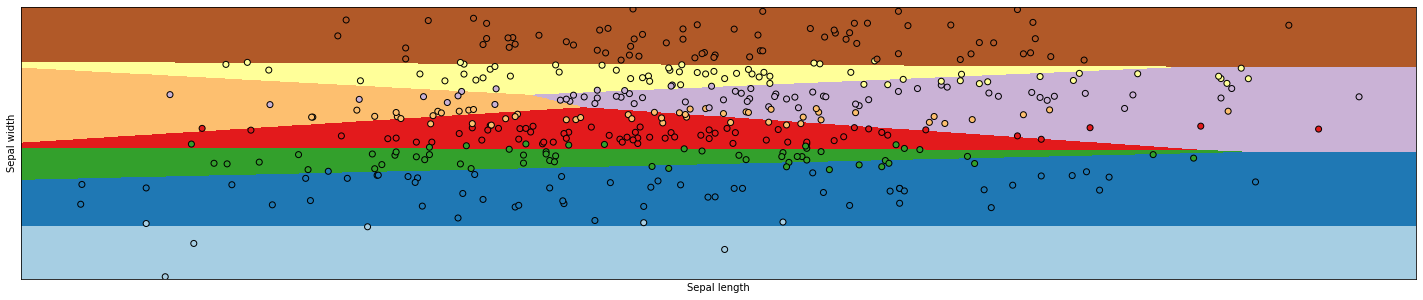

In [1135]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.metrics import classification_report


# import some data to play with
iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features.
# Y = iris.target
X = postsecondary_significant_features_outlier_removed_df[["Pupil/Teacher Ratio", "CRDC: Number of Single-Sex Sports Offered. For Males."]].values.astype(float)
Y = postsecondary_significant_features_outlier_removed_df.iloc[:,12].values.astype(int)

h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

print(logreg.score(X,Y))
y_predict = logreg.predict(X)
report = classification_report(Y,y_predict)
print(report)


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(25, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

Automatically created module for IPython interactive environment
(419,)

Prediction accuracy for the normal test dataset with PCA
21.43%


Prediction accuracy for the standardized test dataset with PCA
20.63%


PC 1 without scaling:
 [-0.002784    0.99999612]

PC 1 with scaling:
 [-0.70710678  0.70710678]


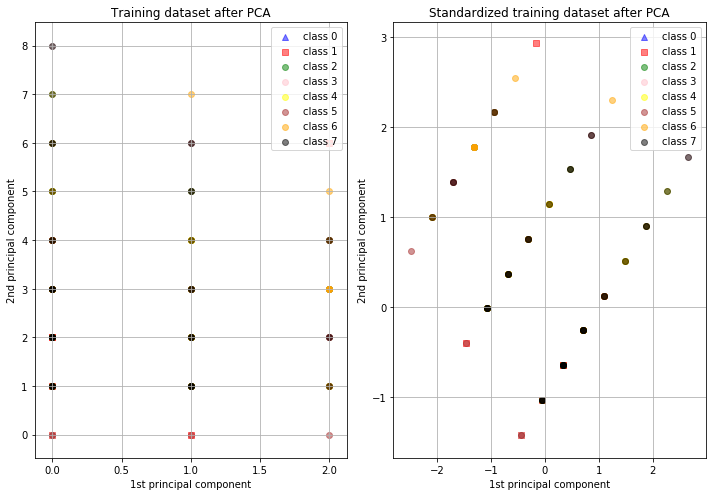

In [440]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
print(__doc__)

# Code source: Tyler Lanigan <tylerlanigan@gmail.com>
#              Sebastian Raschka <mail@sebastianraschka.com>

# License: BSD 3 clause

RANDOM_STATE = 42
FIG_SIZE = (10, 7)


features, target = X = postsecondary_significant_features_outlier_removed_df.iloc[:,7:9].values.astype(float), postsecondary_significant_features_outlier_removed_df.iloc[:,12].values.astype(int)

print(target.shape)

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.3,
                                                    random_state=RANDOM_STATE)

# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))

# Extract PCA from pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']


# Show first principal componenets
print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 1 with scaling:\n', pca_std.components_[0])

# Scale and use PCA on X_train data for visualization.
scaler = std_clf.named_steps['standardscaler']
X_train_std = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)


for l, c, m in zip(range(0, 8), ('blue', 'red', 'green', 'pink', 'yellow', 'brown', 'orange', 'black'), ('^', 's', 'o', 'o', 'o', 'o', 'o', 'o', 'o')):
    ax1.scatter(X_train[y_train == l, 0], X_train[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 8), ('blue', 'red', 'green', 'pink', 'yellow', 'brown', 'orange', 'black'), ('^', 's', 'o', 'o', 'o', 'o', 'o', 'o', 'o')):
    ax2.scatter(X_train_std[y_train == l, 0], X_train_std[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

0.6205250596658711
              precision    recall  f1-score   support

           1       1.00      0.29      0.44         7
           2       0.72      0.98      0.83        52
           3       0.49      0.44      0.46        57
           4       0.45      0.61      0.52        62
           5       0.67      0.04      0.07        52
           6       0.54      0.71      0.61        62
           7       0.72      0.58      0.64        59
           8       0.82      0.94      0.88        68

    accuracy                           0.62       419
   macro avg       0.68      0.57      0.56       419
weighted avg       0.64      0.62      0.58       419



/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


([], <a list of 0 Text yticklabel objects>)

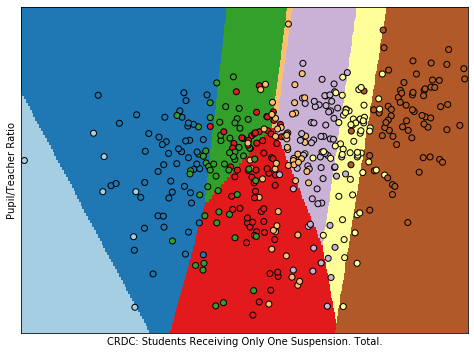

In [1121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
import seaborn as sns;

# import some data to play with
iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features.
# Y = iris.target

# X1 = postsecondary_component_analysis_df['Safe Schools: Academic Suspensions','Pupil/Teacher Ratio'].values.astype(float)


X = postsecondary_significant_features_outlier_removed_df[["Graduates: Percent College Bound", "Attendance Rate"]].values.astype(float)
Y = postsecondary_significant_features_outlier_removed_df.iloc[:,12].values.astype(int)

# print(Y1)
# print(Y)
h = .1
# step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)
print(logreg.score(X,Y))
y_predict = logreg.predict(X)
report = classification_report(Y,y_predict)
print(report)


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# ax = sns.regplot(x=X[:,0], y=X[:,1], data=X,logistic=True, n_boot=500, y_jitter=.03)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('CRDC: Students Receiving Only One Suspension. Total.')
plt.ylabel('Pupil/Teacher Ratio')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

In [1146]:
# people_outcomes_opportunities_highschool_df.columns.values

In [1143]:
county_school_info_df = people_outcomes_opportunities_highschool_df[["County_x", "Enrollment: All Grades. Total.", "Pupil/Teacher Ratio", 'Enrollment: Percent From Low Income Families', "Graduates: Percent Postsecondary Bound", "4 Year Cohort Graduation Rate: Total", 'Dropout Rate (Total Dropouts/Dropout Eligible Enrollment)']]


In [1147]:
county_school_info_df['Enrollment: Percent From Low Income Families'] = county_school_info_df['Enrollment: Percent From Low Income Families'].astype(float)

county_school_info_df['Graduates: Percent Postsecondary Bound'] = county_school_info_df['Graduates: Percent Postsecondary Bound'].astype(float)

county_school_info_df['4 Year Cohort Graduation Rate: Total'] = county_school_info_df['Graduates: Percent Postsecondary Bound'].astype(float)

county_school_info_df['4 Year Cohort Graduation Rate: Total'] = county_school_info_df['Dropout Rate (Total Dropouts/Dropout Eligible Enrollment)'].astype(float)

/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/austingerner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value 

In [1149]:
county_school_info_df.head()

County_x  Enrollment: All Grades. Total.  Pupil/Teacher Ratio  \
0  Fayette                          1111.0                16.72   
1  Fayette                           480.0                12.90   
2  Fayette                          1162.0                14.75   
3  Fayette                           340.0                14.17   
4  Fayette                           943.0                14.51   

   Enrollment: Percent From Low Income Families  \
0                                          48.9   
1                                          59.8   
2                                          52.6   
3                                          41.9   
4                                          54.2   

   Graduates: Percent Postsecondary Bound  \
0                                   56.23   
1                                   64.66   
2                                   69.72   
3                                   67.53   
4                                   77.20   

   4 Year Cohort Graduation Rate: Total  \
0                                   2.2   
1                                   4.4   
2                                   0.2   
3                                   2.0   
4                                   2.4   

  Dropout Rate (Total Dropouts/Dropout Eligible Enrollment)  
0                                                2.2         
1                                                4.4         
2                                                 .2         
3                                                  2         
4                                                2.4